# File Loading + Package Installations

In [ ]:
! gdown https://drive.google.com/uc?id=1Wim6vRZtLd3XKpdlqNq7N6HEbVr14Rt5

Downloading...
From: https://drive.google.com/uc?id=1Wim6vRZtLd3XKpdlqNq7N6HEbVr14Rt5
To: /content/Projectdata_motor.csv
221MB [00:01, 160MB/s]


In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 6.3MB/s 
     |████████████████████████████████| 15.3MB 330kB/s 
     |████████████████████████████████| 6.5MB 45.9MB/s 


In [ ]:
!pip3 install mlxtend --upgrade

     |████████████████████████████████| 1.4MB 4.8MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


# Libraries

In [ ]:
import numpy as np
import pandas as pd
import csv
import re
from collections import Counter
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
import time


# import geopandas as gpd
# from shapely.geometry import Point, Polygon

# Deliverable 1 - EDA

## Loading Data

In [ ]:
data = pd.read_csv('Projectdata_motor.csv')

In [ ]:
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,07/04/2018,12:20,NaN,NaN,40.723747,-74.00612,"(40.723747, -74.00612)",VARICK STREET,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Aggressive Driving/Road Rage,Aggressive Driving/Road Rage,NaN,NaN,NaN,3934661,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,07/23/2018,16:30,NaN,NaN,40.822628,-73.94351,"(40.822628, -73.94351)",WEST 144 STREET,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3947774,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2,07/13/2018,15:40,BROOKLYN,11212.0,40.665146,-73.90230,"(40.665146, -73.9023)",NaN,NaN,455 DUMONT AVENUE,1.0,0.0,0,0,1,0,0,0,Failure to Yield Right-of-Way,Passing or Lane Usage Improper,NaN,NaN,NaN,3943533,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN
3,07/25/2018,11:30,BROOKLYN,11211.0,40.713043,-73.94467,"(40.713043, -73.94467)",NaN,NaN,235 AINSLIE STREET,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3949035,Sedan,NaN,NaN,NaN,NaN
4,07/05/2018,20:32,BROOKLYN,11207.0,40.658577,-73.89063,"(40.658577, -73.89063)",PENNSYLVANIA AVENUE,LINDEN BOULEVARD,NaN,2.0,0.0,0,0,0,0,2,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,3936055,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [ ]:
data['VEHICLE TYPE CODE 1'].unique()

array(['Taxi', 'Station Wagon/Sport Utility Vehicle', 'Sedan', ...,
       '15 pa', 'FLED', 'g scl'], dtype=object)

## Data Preprocessing

In [ ]:
data.isna().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           371386
ZIP CODE                          371581
LATITUDE                           98961
LONGITUDE                          98961
LOCATION                           98961
ON STREET NAME                    250104
CROSS STREET NAME                 511317
OFF STREET NAME                   810481
NUMBER OF PERSONS INJURED             17
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       3473
CONTRIBUTING FACTOR VEHICLE 2     162997
CONTRIBUTING FACTOR VEHICLE 3     977431
CONTRIBUTING FACTOR VEHICLE 4    1032960
CONTRIBUTING FACTOR VEHICLE 5    1044388
COLLISION_ID                           0
VEHICLE TYPE COD

In [ ]:
data.shape

(1048575, 29)

In [ ]:
# Persons killed/injured filled to 0
data['NUMBER OF PERSONS KILLED'] = data['NUMBER OF PERSONS KILLED'].fillna(0)
data['NUMBER OF PERSONS INJURED'] = data['NUMBER OF PERSONS INJURED'].fillna(0)

# Nan values replaced with relavent words
data['BOROUGH'] = data['BOROUGH'].fillna('Unidentified')
data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].fillna('unspecified')
data['CONTRIBUTING FACTOR VEHICLE 2'] = data['CONTRIBUTING FACTOR VEHICLE 2'].fillna('unspecified')
data['CONTRIBUTING FACTOR VEHICLE 3'] = data['CONTRIBUTING FACTOR VEHICLE 3'].fillna('unspecified')
data['CONTRIBUTING FACTOR VEHICLE 4'] = data['CONTRIBUTING FACTOR VEHICLE 4'].fillna('unspecified')
data['CONTRIBUTING FACTOR VEHICLE 5'] = data['CONTRIBUTING FACTOR VEHICLE 5'].fillna('unspecified')

data['VEHICLE TYPE CODE 1'] = data['VEHICLE TYPE CODE 1'].fillna('unknown')
data['VEHICLE TYPE CODE 2'] = data['VEHICLE TYPE CODE 2'].fillna('unknown')
data['VEHICLE TYPE CODE 3'] = data['VEHICLE TYPE CODE 3'].fillna('unknown')
data['VEHICLE TYPE CODE 4'] = data['VEHICLE TYPE CODE 4'].fillna('unknown')
data['VEHICLE TYPE CODE 5'] = data['VEHICLE TYPE CODE 5'].fillna('unknown')
data.isna().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                               0
ZIP CODE                         371581
LATITUDE                          98961
LONGITUDE                         98961
LOCATION                          98961
ON STREET NAME                   250104
CROSS STREET NAME                511317
OFF STREET NAME                  810481
NUMBER OF PERSONS INJURED             0
NUMBER OF PERSONS KILLED              0
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1         0
CONTRIBUTING FACTOR VEHICLE 2         0
CONTRIBUTING FACTOR VEHICLE 3         0
CONTRIBUTING FACTOR VEHICLE 4         0
CONTRIBUTING FACTOR VEHICLE 5         0
COLLISION_ID                          0
VEHICLE TYPE CODE 1                   0


In [ ]:
# Fixed date time format
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'],infer_datetime_format=True).dt.time
data['CRASH DATE'].replace(to_replace=r'\-', value=r'\/', regex=True, inplace=True)
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data = data[data['CRASH DATE'].dt.year > 2012]

# Changing attributes to lower case for consistency
data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].str.lower()
data['CONTRIBUTING FACTOR VEHICLE 2'] = data['CONTRIBUTING FACTOR VEHICLE 2'].str.lower()
data['CONTRIBUTING FACTOR VEHICLE 3'] = data['CONTRIBUTING FACTOR VEHICLE 3'].str.lower()
data['CONTRIBUTING FACTOR VEHICLE 4'] = data['CONTRIBUTING FACTOR VEHICLE 4'].str.lower()
data['CONTRIBUTING FACTOR VEHICLE 5'] = data['CONTRIBUTING FACTOR VEHICLE 5'].str.lower()

data['VEHICLE TYPE CODE 1'] = data['VEHICLE TYPE CODE 1'].str.lower()
data['VEHICLE TYPE CODE 2'] = data['VEHICLE TYPE CODE 2'].str.lower()
data['VEHICLE TYPE CODE 3'] = data['VEHICLE TYPE CODE 3'].str.lower()
data['VEHICLE TYPE CODE 4'] = data['VEHICLE TYPE CODE 4'].str.lower()
data['VEHICLE TYPE CODE 5'] = data['VEHICLE TYPE CODE 5'].str.lower()

# Fixing spelling mistake in contributing factor
data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].apply(lambda x: 'illness' if re.findall("^ill", str(x)) else x)
data['CONTRIBUTING FACTOR VEHICLE 2'] = data['CONTRIBUTING FACTOR VEHICLE 2'].apply(lambda x: 'illness' if re.findall("^ill", str(x)) else x)
data['CONTRIBUTING FACTOR VEHICLE 3'] = data['CONTRIBUTING FACTOR VEHICLE 3'].apply(lambda x: 'illness' if re.findall("^ill", str(x)) else x)
data['CONTRIBUTING FACTOR VEHICLE 4'] = data['CONTRIBUTING FACTOR VEHICLE 4'].apply(lambda x: 'illness' if re.findall("^ill", str(x)) else x)
data['CONTRIBUTING FACTOR VEHICLE 5'] = data['CONTRIBUTING FACTOR VEHICLE 5'].apply(lambda x: 'illness' if re.findall("^ill", str(x)) else x)

data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2018-07-04,12:20:00,Unidentified,NaN,40.723747,-74.00612,"(40.723747, -74.00612)",VARICK STREET,NaN,NaN,0.0,0.0,0,0,0,0,0,0,aggressive driving/road rage,aggressive driving/road rage,unspecified,unspecified,unspecified,3934661,taxi,station wagon/sport utility vehicle,unknown,unknown,unknown
1,2018-07-23,16:30:00,Unidentified,NaN,40.822628,-73.94351,"(40.822628, -73.94351)",WEST 144 STREET,NaN,NaN,0.0,0.0,0,0,0,0,0,0,unspecified,unspecified,unspecified,unspecified,unspecified,3947774,station wagon/sport utility vehicle,unknown,unknown,unknown,unknown
2,2018-07-13,15:40:00,BROOKLYN,11212.0,40.665146,-73.90230,"(40.665146, -73.9023)",NaN,NaN,455 DUMONT AVENUE,1.0,0.0,0,0,1,0,0,0,failure to yield right-of-way,passing or lane usage improper,unspecified,unspecified,unspecified,3943533,station wagon/sport utility vehicle,bike,unknown,unknown,unknown
3,2018-07-25,11:30:00,BROOKLYN,11211.0,40.713043,-73.94467,"(40.713043, -73.94467)",NaN,NaN,235 AINSLIE STREET,0.0,0.0,0,0,0,0,0,0,unspecified,unspecified,unspecified,unspecified,unspecified,3949035,sedan,unknown,unknown,unknown,unknown
4,2018-07-05,20:32:00,BROOKLYN,11207.0,40.658577,-73.89063,"(40.658577, -73.89063)",PENNSYLVANIA AVENUE,LINDEN BOULEVARD,NaN,2.0,0.0,0,0,0,0,2,0,failure to yield right-of-way,unspecified,unspecified,unspecified,unspecified,3936055,station wagon/sport utility vehicle,sedan,unknown,unknown,unknown


In [ ]:
# Fixing spelling mistakes vehicle type
# Fixing spelling mistakes vehicle type
data['VEHICLE TYPE CODE 1'] = data['VEHICLE TYPE CODE 1'].apply(lambda x: 'ambulance' if re.findall("^amb", str(x)) else x)
data['VEHICLE TYPE CODE 2'] = data['VEHICLE TYPE CODE 2'].apply(lambda x: 'ambulance' if re.findall("^amb", str(x)) else x)
data['VEHICLE TYPE CODE 3'] = data['VEHICLE TYPE CODE 3'].apply(lambda x: 'ambulance' if re.findall("^amb", str(x)) else x)
data['VEHICLE TYPE CODE 4'] = data['VEHICLE TYPE CODE 4'].apply(lambda x: 'ambulance' if re.findall("^amb", str(x)) else x)
data['VEHICLE TYPE CODE 5'] = data['VEHICLE TYPE CODE 5'].apply(lambda x: 'ambulance' if re.findall("^amb", str(x)) else x)

data['VEHICLE TYPE CODE 1'] = data['VEHICLE TYPE CODE 1'].apply(lambda x: 'unknown' if re.findall("^((unk)|(ukn)|(unnko))", str(x)) else x)
data['VEHICLE TYPE CODE 2'] = data['VEHICLE TYPE CODE 2'].apply(lambda x: 'unknown' if re.findall("^((unk)|(ukn)|(unnko))", str(x)) else x)
data['VEHICLE TYPE CODE 3'] = data['VEHICLE TYPE CODE 3'].apply(lambda x: 'unknown' if re.findall("^((unk)|(ukn)|(unnko))", str(x)) else x)
data['VEHICLE TYPE CODE 4'] = data['VEHICLE TYPE CODE 4'].apply(lambda x: 'unknown' if re.findall("^((unk)|(ukn)|(unnko))", str(x)) else x)
data['VEHICLE TYPE CODE 5'] = data['VEHICLE TYPE CODE 5'].apply(lambda x: 'unknown' if re.findall("^((unk)|(ukn)|(unnko))", str(x)) else x)

data['VEHICLE TYPE CODE 1'] = data['VEHICLE TYPE CODE 1'].apply(lambda x: 'uhaul' if re.findall("uhual", str(x)) else x)
data['VEHICLE TYPE CODE 2'] = data['VEHICLE TYPE CODE 2'].apply(lambda x: 'uhaul' if re.findall("uhual", str(x)) else x)
data['VEHICLE TYPE CODE 3'] = data['VEHICLE TYPE CODE 3'].apply(lambda x: 'uhaul' if re.findall("uhual", str(x)) else x)
data['VEHICLE TYPE CODE 4'] = data['VEHICLE TYPE CODE 4'].apply(lambda x: 'uhaul' if re.findall("uhual", str(x)) else x)
data['VEHICLE TYPE CODE 5'] = data['VEHICLE TYPE CODE 5'].apply(lambda x: 'uhaul' if re.findall("uhual", str(x)) else x)

data['VEHICLE TYPE CODE 1'] = data['VEHICLE TYPE CODE 1'].apply(lambda x: 'utility' if re.findall("^ut", str(x)) else x)
data['VEHICLE TYPE CODE 2'] = data['VEHICLE TYPE CODE 2'].apply(lambda x: 'utility' if re.findall("^ut", str(x)) else x)
data['VEHICLE TYPE CODE 3'] = data['VEHICLE TYPE CODE 3'].apply(lambda x: 'utility' if re.findall("^ut", str(x)) else x)
data['VEHICLE TYPE CODE 4'] = data['VEHICLE TYPE CODE 4'].apply(lambda x: 'utility' if re.findall("^ut", str(x)) else x)
data['VEHICLE TYPE CODE 5'] = data['VEHICLE TYPE CODE 5'].apply(lambda x: 'utility' if re.findall("^ut", str(x)) else x)

data['VEHICLE TYPE CODE 1'] = data['VEHICLE TYPE CODE 1'].apply(lambda x: 'us postal' if re.findall("^(us po)", str(x)) else x)
data['VEHICLE TYPE CODE 2'] = data['VEHICLE TYPE CODE 2'].apply(lambda x: 'us postal' if re.findall("^(us po)", str(x)) else x)
data['VEHICLE TYPE CODE 3'] = data['VEHICLE TYPE CODE 3'].apply(lambda x: 'us postal' if re.findall("^(us po)", str(x)) else x)
data['VEHICLE TYPE CODE 4'] = data['VEHICLE TYPE CODE 4'].apply(lambda x: 'us postal' if re.findall("^(us po)", str(x)) else x)
data['VEHICLE TYPE CODE 5'] = data['VEHICLE TYPE CODE 5'].apply(lambda x: 'us postal' if re.findall("^(us po)", str(x)) else x)

data['VEHICLE TYPE CODE 1'] = data['VEHICLE TYPE CODE 1'].apply(lambda x: 'van truck' if re.findall("^(van t)", str(x)) else x)
data['VEHICLE TYPE CODE 2'] = data['VEHICLE TYPE CODE 2'].apply(lambda x: 'van truck' if re.findall("^(van t)", str(x)) else x)
data['VEHICLE TYPE CODE 3'] = data['VEHICLE TYPE CODE 3'].apply(lambda x: 'van truck' if re.findall("^(van t)", str(x)) else x)
data['VEHICLE TYPE CODE 4'] = data['VEHICLE TYPE CODE 4'].apply(lambda x: 'van truck' if re.findall("^(van t)", str(x)) else x)
data['VEHICLE TYPE CODE 5'] = data['VEHICLE TYPE CODE 5'].apply(lambda x: 'van truck' if re.findall("^(van t)", str(x)) else x)

data['VEHICLE TYPE CODE 1'] = data['VEHICLE TYPE CODE 1'].apply(lambda x: 'sedan' if re.findall("sedan", str(x)) else x)
data['VEHICLE TYPE CODE 2'] = data['VEHICLE TYPE CODE 2'].apply(lambda x: 'sedan' if re.findall("sedan", str(x)) else x)
data['VEHICLE TYPE CODE 3'] = data['VEHICLE TYPE CODE 3'].apply(lambda x: 'sedan' if re.findall("sedan", str(x)) else x)
data['VEHICLE TYPE CODE 4'] = data['VEHICLE TYPE CODE 4'].apply(lambda x: 'sedan' if re.findall("sedan", str(x)) else x)
data['VEHICLE TYPE CODE 5'] = data['VEHICLE TYPE CODE 5'].apply(lambda x: 'sedan' if re.findall("sedan", str(x)) else x)

data['VEHICLE TYPE CODE 1'] = data['VEHICLE TYPE CODE 1'].apply(lambda x: '18 wheeler' if re.findall("^18", str(x)) else x)
data['VEHICLE TYPE CODE 2'] = data['VEHICLE TYPE CODE 2'].apply(lambda x: '18 wheeler' if re.findall("^18", str(x)) else x)
data['VEHICLE TYPE CODE 3'] = data['VEHICLE TYPE CODE 3'].apply(lambda x: '18 wheeler' if re.findall("^18", str(x)) else x)
data['VEHICLE TYPE CODE 4'] = data['VEHICLE TYPE CODE 4'].apply(lambda x: '18 wheeler' if re.findall("^18", str(x)) else x)
data['VEHICLE TYPE CODE 5'] = data['VEHICLE TYPE CODE 5'].apply(lambda x: '18 wheeler' if re.findall("^18", str(x)) else x)

data['VEHICLE TYPE CODE 1'] = data['VEHICLE TYPE CODE 1'].apply(lambda x: 'sport utility / station wagon' if re.findall("sport utility vehicle", str(x)) else x)
data['VEHICLE TYPE CODE 2'] = data['VEHICLE TYPE CODE 2'].apply(lambda x: 'sport utility / station wagon' if re.findall("sport utility vehicle", str(x)) else x)
data['VEHICLE TYPE CODE 3'] = data['VEHICLE TYPE CODE 3'].apply(lambda x: 'sport utility / station wagon' if re.findall("sport utility vehicle", str(x)) else x)
data['VEHICLE TYPE CODE 4'] = data['VEHICLE TYPE CODE 4'].apply(lambda x: 'sport utility / station wagon' if re.findall("sport utility vehicle", str(x)) else x)
data['VEHICLE TYPE CODE 5'] = data['VEHICLE TYPE CODE 5'].apply(lambda x: 'sport utility / station wagon' if re.findall("sport utility vehicle", str(x)) else x)

In [ ]:
# Checking for duplicate collision ids
Counter(data['COLLISION_ID']).most_common(5)

[(3934661, 1), (3947774, 1), (3943533, 1), (3949035, 1), (3936055, 1)]

In [ ]:
data['VEHICLE TYPE CODE 1'].unique()

array(['taxi', 'sport utility / station wagon', 'sedan',
       'tractor truck diesel', 'bus', 'hopper', 'box truck',
       'pick-up truck', 'motorcycle', 'bike', 'convertible', 'dump', 'pk',
       'passenger vehicle', 'flat bed', 'ambulance', 'van', 'flat rack',
       'usps', 'trail', 'chassis cab', 'truck', 'concrete mixer', 'elect',
       'unknown', 'carry all', 'tow truck / wrecker', 'mack',
       'garbage or refuse', 'tractor truck gasoline', 'motorscooter',
       'comme', 'motorbike', 'firet', 'e-scooter', '3-door', 'utility',
       'refrigerated van', 'rv', 'e-bik', 'tanker', 'moped', 'schoo',
       'sweep', 'box t', 'com', 'tract', 'l1', 'multi-wheeled vehicle',
       'fire', 'picku', 'beverage truck', 'stak', 'fork-', 'fdny',
       'dumps', 'case', 'grain', 'fork', 'lift boom', 'flat', 'fd tr',
       'motorized home', 'armored truck', 'spc', 'minibike', 'trailer',
       'omr', 'wheel', 'gator', 'van camper', 'scoot', 'heavy', 'food',
       'open body', 'comb', 'se

## Accidents and Location - where do accidents occur?

This also includes a few summary data

In [ ]:
#Computing means
avg_killed = data['NUMBER OF PERSONS KILLED'].mean()
avg_injured = data['NUMBER OF PERSONS INJURED'].mean()

kills = data[['CRASH DATE', 'NUMBER OF PERSONS KILLED']]
kills = kills[kills['CRASH DATE'].dt.year > 2013]
total_kills_year = kills.groupby(kills['CRASH DATE'].dt.year).sum()
mean_kills_year = total_kills_year['NUMBER OF PERSONS KILLED'].mean()

injure = data[['CRASH DATE', 'NUMBER OF PERSONS INJURED']]
injure = injure[injure['CRASH DATE'].dt.year > 2013]
total_injure_year = injure.groupby(injure['CRASH DATE'].dt.year).sum()
mean_injure_year = total_injure_year['NUMBER OF PERSONS INJURED'].mean()

print("MEAN PERSONS KILLED PER ACCIDENT: ", avg_killed)
print("MEAN PERSONS INJURED PER ACCIDENT: ", avg_injured)
print("MEAN CASUALTIES IN NYC PER YEAR: ", mean_kills_year)
print("MEAN INJURIES IN NYC PER YEAR: ", mean_injure_year)

MEAN PERSONS KILLED PER ACCIDENT:  0.0012378716237480616
MEAN PERSONS INJURED PER ACCIDENT:  0.2844730081043398
MEAN CASUALTIES IN NYC PER YEAR:  162.25
MEAN INJURIES IN NYC PER YEAR:  37265.75


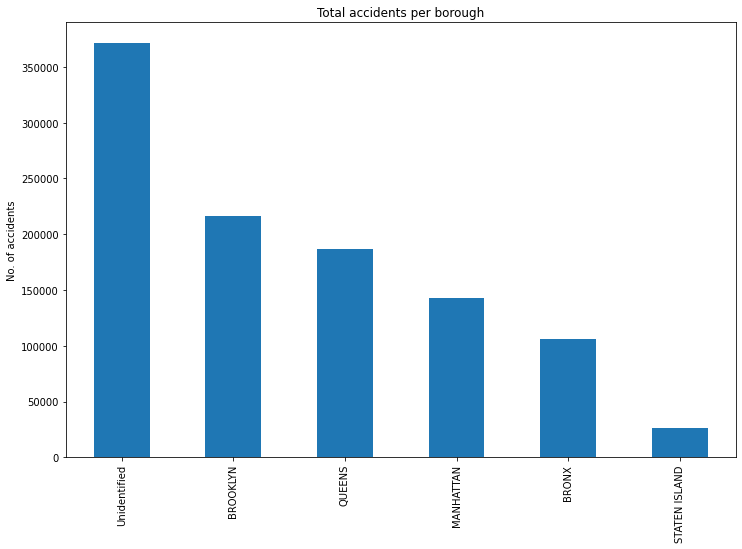

In [ ]:
# Borough-wise accidents
data['BOROUGH'].value_counts().plot(kind='bar', figsize=(12, 8), ylabel='No. of accidents', title='Total accidents per borough')

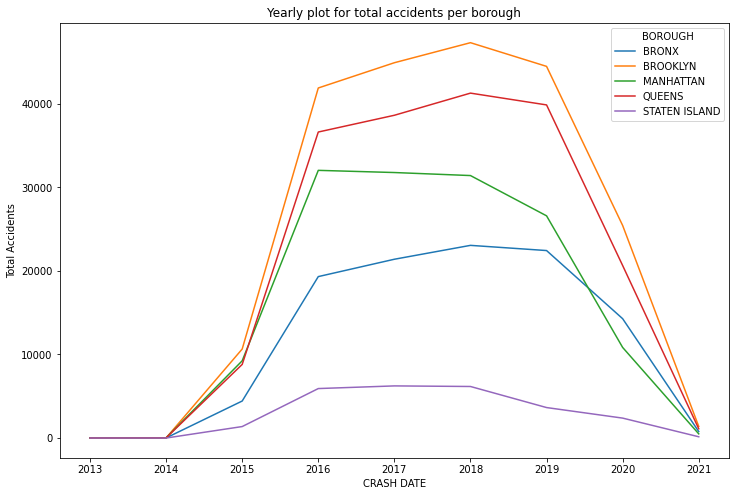

In [ ]:
#Yearly accident trend for every borough
borough_data = data
borough_data = borough_data.sort_values('CRASH DATE', ascending=True)
borough_data = borough_data[borough_data['BOROUGH'] != 'Unidentified']
pv_borough = pd.pivot_table(borough_data, index=borough_data['CRASH DATE'].dt.year, columns=borough_data['BOROUGH'],
                             values='BOROUGH', aggfunc='count')
pv_borough.plot(figsize=(12,8), title='Yearly plot for total accidents per borough', ylabel='Total Accidents')

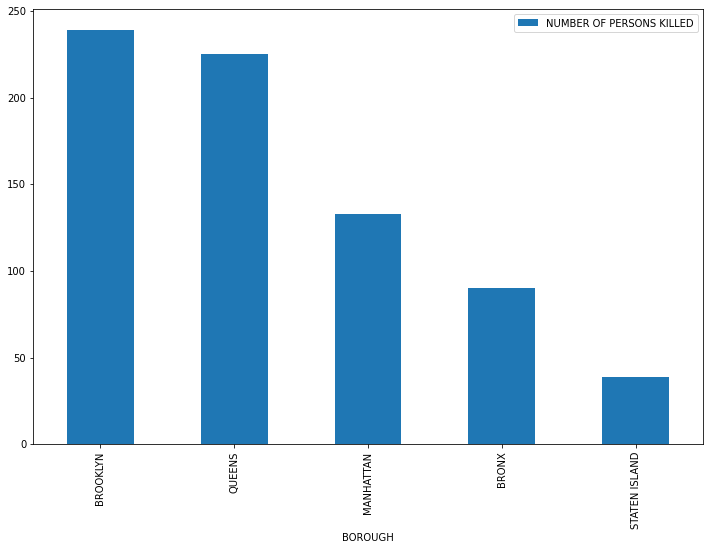

In [ ]:
#Total kills in every borough
pv_borough_kills = pd.pivot_table(borough_data, index=borough_data['BOROUGH'],
                             values='NUMBER OF PERSONS KILLED', aggfunc='sum').sort_values('NUMBER OF PERSONS KILLED', ascending=False)
pv_borough_kills.plot(kind='bar', figsize=(12,8))

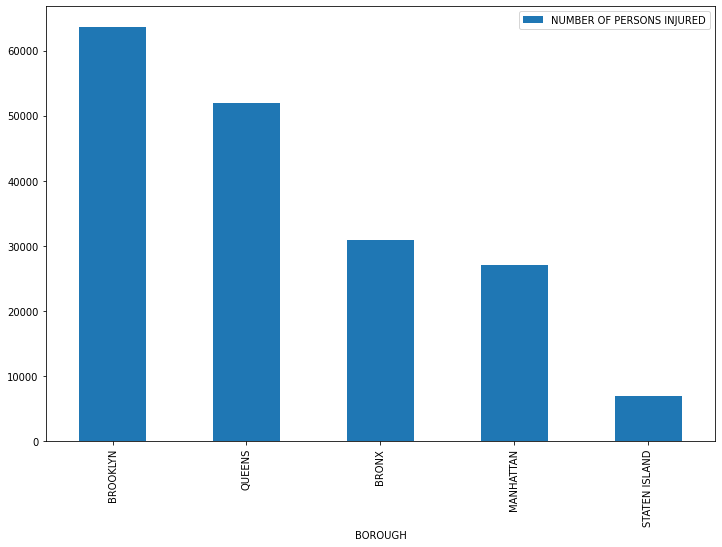

In [ ]:
#Total injuries in every borough
pv_borough_injure = pd.pivot_table(borough_data, index=borough_data['BOROUGH'],
                             values='NUMBER OF PERSONS INJURED', aggfunc='sum').sort_values('NUMBER OF PERSONS INJURED', ascending=False)
pv_borough_injure.plot(kind='bar', figsize=(12,8))

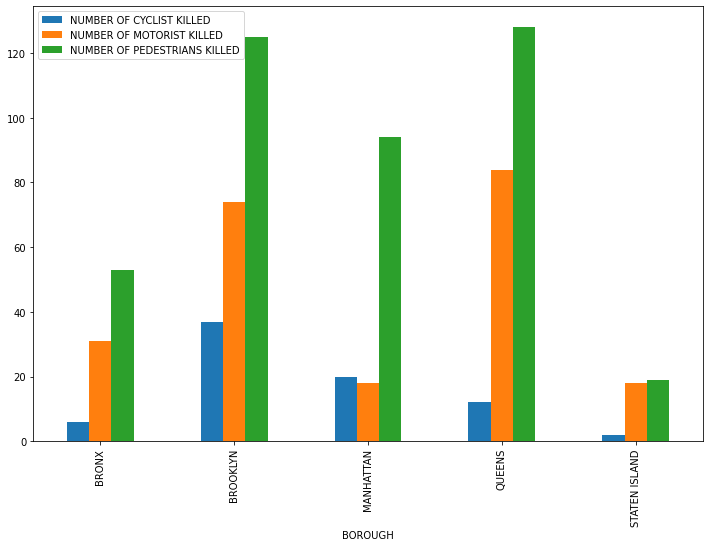

In [ ]:
#Borough kills grouped by people type
borough_data_kill = borough_data[['BOROUGH', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST KILLED', 'NUMBER OF PEDESTRIANS KILLED']]
g = borough_data_kill.groupby('BOROUGH').sum()
g.plot(kind='bar', figsize=(12,8))

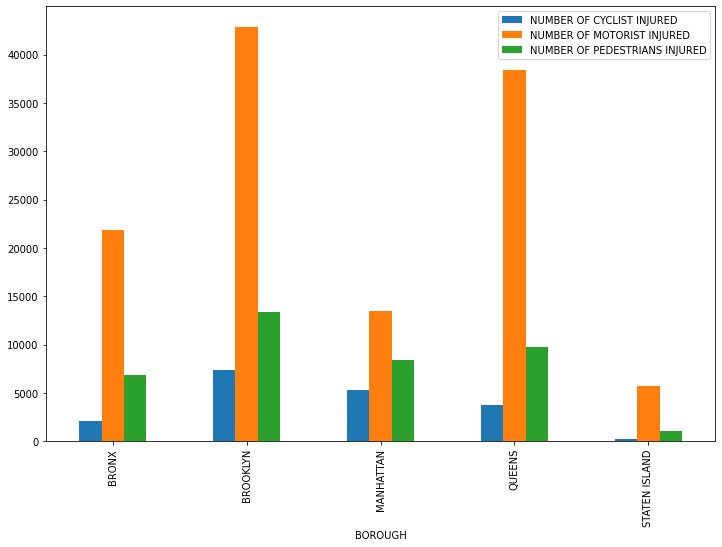

In [ ]:
#Borough injuries grouped by people type
borough_data_injure = borough_data[['BOROUGH', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF PEDESTRIANS INJURED']]
g = borough_data_injure.groupby('BOROUGH').sum()
g.plot(kind='bar', figsize=(12,8))

## Accidents and Time - when do accidents occur?

Text(0, 0.5, 'Accident count')

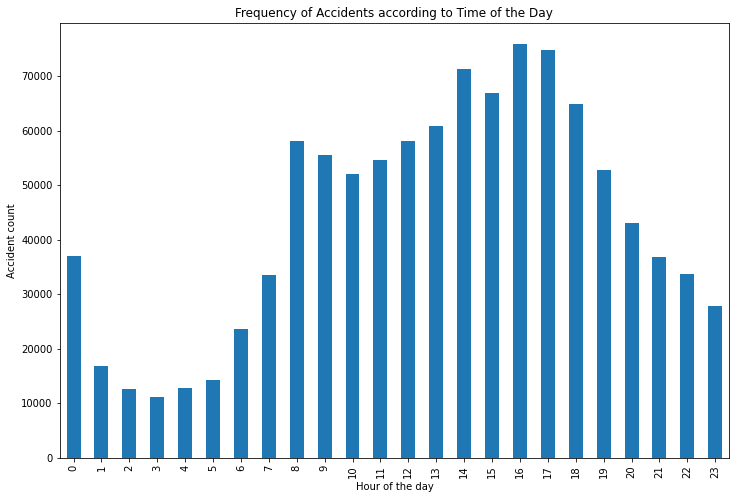

In [ ]:
#Compare accidents at rush hour times (on times (8-9) and off times (3-7)) 
#- plot timely data with number of accidents
time_df = pd.DataFrame(data, columns = ["CRASH TIME"])
time_df["CRASH HOUR"] = time_df["CRASH TIME"].apply(lambda x: x.hour)
ax = time_df.groupby("CRASH HOUR").agg("count").plot(kind = "bar", legend = False, title = "Frequency of Accidents according to Time of the Day", figsize=(12,8))
ax.set_xlabel("Hour of the day")
ax.set_ylabel("Accident count")

Text(0, 0.5, 'Accident count')

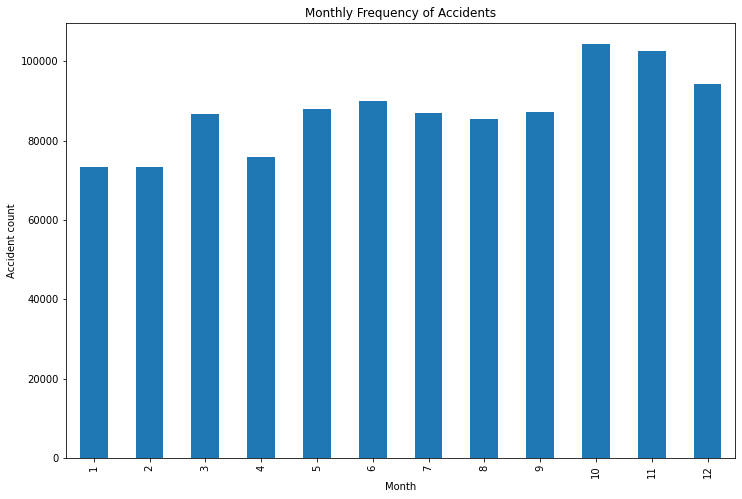

In [ ]:
# Look at peaks in accidents on certain occasions (new years etc) - plot monthly data to weed out potentials
month_df = pd.DataFrame(data, columns = ["CRASH DATE"])
month_df["CRASH MONTH"] = month_df["CRASH DATE"].apply(lambda x: x.month)
ax = month_df.groupby("CRASH MONTH").agg("count").plot(kind = "bar", legend = False, title='Monthly Frequency of Accidents', figsize=(12,8))
ax.set_xlabel("Month")
ax.set_ylabel("Accident count")

## Accidents and Contributing Factors - which factors stand out in accidents?

Text(0, 0.5, 'No. of Accidents')

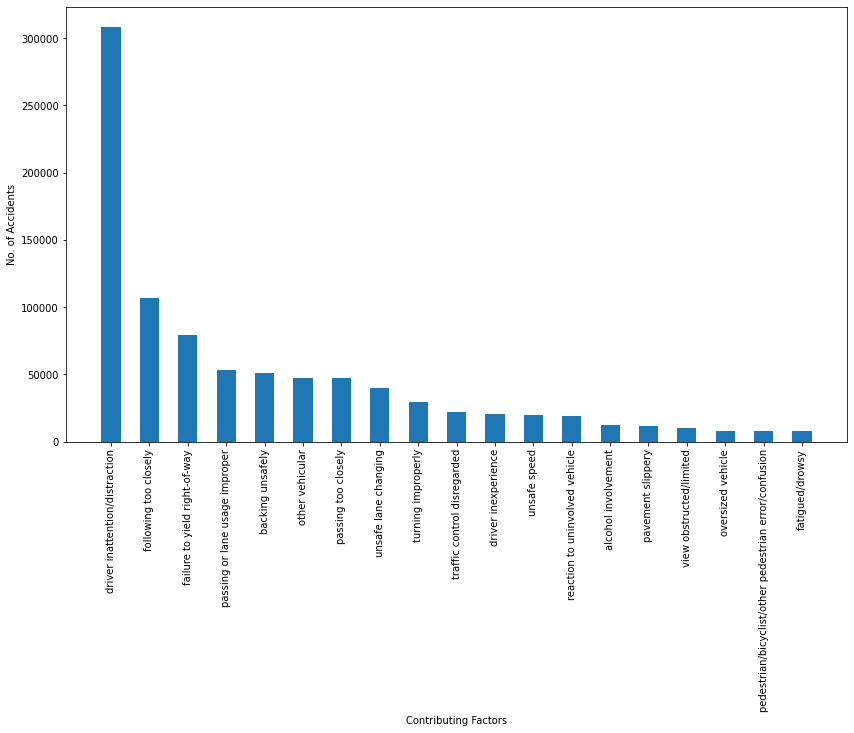

In [ ]:
# Most common contributing factors
array = data['CONTRIBUTING FACTOR VEHICLE 1'].to_list() + data['CONTRIBUTING FACTOR VEHICLE 2'].to_list() + data['CONTRIBUTING FACTOR VEHICLE 3'].to_list() + data['CONTRIBUTING FACTOR VEHICLE 4'].to_list() + data['CONTRIBUTING FACTOR VEHICLE 5'].to_list()
import collections
counter = collections.Counter(array)
a = counter.most_common(20)
temp_str = list()
temp_value = list()

for i in range(len(a)):

  temp_str.append(a[i][0])
  temp_value.append(a[i][1])

temp_str.remove(temp_str[0])
temp_value.remove(temp_value[0])
plt.figure(figsize=(14,8))
plt.xticks(rotation = 90)
plt.bar(temp_str,temp_value,0.5)
plt.xlabel('Contributing Factors')
plt.ylabel('No. of Accidents')

In [ ]:
len(set(array))

58

## Accidents and Vehicle types - which vehicle types are involved in accidents?

Text(0, 0.5, 'No. of Accidents')

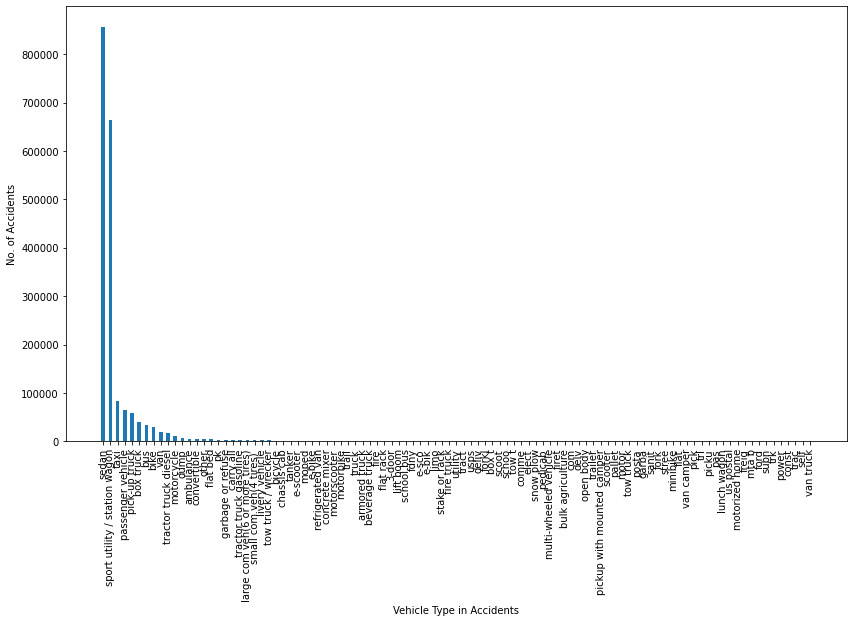

In [ ]:
# Most common vehicles involved in crashes
l1 = list(data['VEHICLE TYPE CODE 1'])
l2 = list(data['VEHICLE TYPE CODE 2'])
l3 = list(data['VEHICLE TYPE CODE 3'])
l4 = list(data['VEHICLE TYPE CODE 4'])
l5 = list(data['VEHICLE TYPE CODE 5'])

for i in range(len(l2)):
  l1.append(l2[i])
  l1.append(l3[i])
  l1.append(l4[i])
  l1.append(l5[i])

a = Counter(l1).most_common(100)

temp_str = list()
temp_value = list()

for i in range(len(a)):

  temp_str.append(a[i][0])
  temp_value.append(a[i][1])

temp_str.remove(temp_str[0])
temp_value.remove(temp_value[0])
plt.figure(figsize=(14,8))
plt.xticks(rotation = 90)
plt.bar(temp_str,temp_value,0.5)
plt.xlabel('Vehicle Type in Accidents')
plt.ylabel('No. of Accidents')

In [ ]:
temp_str

['sedan',
 'sport utility / station wagon',
 'taxi',
 'passenger vehicle',
 'pick-up truck',
 'box truck',
 'bus',
 'bike',
 'van',
 'tractor truck diesel',
 'motorcycle',
 'dump',
 'ambulance',
 'convertible',
 'other',
 'flat bed',
 'pk',
 'garbage or refuse',
 'carry all',
 'tractor truck gasoline',
 'large com veh(6 or more tires)',
 'small com veh(4 tires) ',
 'livery vehicle',
 'tow truck / wrecker',
 'bicycle',
 'chassis cab',
 'tanker',
 'e-scooter',
 'moped',
 'e-bike',
 'refrigerated van',
 'concrete mixer',
 'motorscooter',
 'motorbike',
 'trail',
 'truck',
 'armored truck',
 'beverage truck',
 'fire',
 'flat rack',
 '3-door',
 'lift boom',
 'school bus',
 'fdny',
 'e-sco',
 'e-bik',
 'limo',
 'stake or rack',
 'fire truck',
 'utility',
 'tract',
 'usps',
 'deliv',
 'forkl',
 'box t',
 'scoot',
 'schoo',
 'tow t',
 'comme',
 'elect',
 'snow plow',
 'pedicab',
 'multi-wheeled vehicle',
 'firet',
 'bulk agriculture',
 'com',
 'delv',
 'open body',
 'trailer',
 'pickup with mou

In [ ]:
sum(temp_value)

1942353

In [ ]:
sum(temp_value)/sum(Counter(l1).values())

0.37047514052417857

## Geo plots

The below codes mainly adhere to Manhattan - the other boroughs show similar inconclusive results

In [ ]:
# import street map
# Note: download files from the following link (and clicking export) and place them in the working directory 
# - https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm
street_map = gpd.read_file('/content/geo_export_b5008327-4506-42e1-9643-56ca6604d8ee.shp')

NameError: ignored

In [ ]:
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(data['LONGITUDE'], data['LATITUDE'])]
geo_df = gpd.GeoDataFrame(data, crs = crs, geometry = geometry)

In [ ]:
## MANHATTAN
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax, alpha=0.4,color='grey')

geo_df.plot(column='NUMBER OF PERSONS INJURED', ax=ax, color = 'red', markersize=10)

plt.title('Accidents in Manhattan NYC', fontsize=15, fontweight='bold')
plt.xlim(-74.02,-73.925)
plt.ylim( 40.7,40.8)
plt.show()

In [ ]:
## BROOKLYN
fig, ax = plt.subplots(figsize = (15,30))
street_map.plot(ax=ax, alpha=0.4,color='grey')
geo_df.plot(column='NUMBER OF PERSONS INJURED', ax=ax, color = 'red', markersize=10)
plt.title('Accidents in Brookly NYC', fontsize=15, fontweight='bold')
plt.xlim(-74.01,-73.915)
plt.ylim( 40.55,40.76)
plt.show()

### Year-wise geoplots

This was done in an effort to weed out any apparent clusters that the cumulative effect might be hiding

However, it was found that there is no such apparent cluster or places which can be pinpointed to be dangerous/famous for accidents.

In [ ]:
geo_df["CRASH MONTH"] = geo_df["CRASH DATE"].apply(lambda x: x.month)
geo_df["CRASH YEAR"] = geo_df["CRASH DATE"].apply(lambda x: x.year)
grouped_geo_df = geo_df.groupby('CRASH YEAR')

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax, alpha=0.4,color='grey')
grouped_geo_df.get_group(2015).plot(ax=ax, color = 'red', markersize=10)
plt.title('Accidents in Manhattan NYC 2015', fontsize=15, fontweight='bold')
plt.xlim(-74.02,-73.925)
plt.ylim( 40.7,40.8)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax, alpha=0.4,color='grey')
grouped_geo_df.get_group(2016).plot(ax=ax, color = 'red', markersize=10)
plt.title('Accidents in Manhattan NYC 2016', fontsize=15, fontweight='bold')
plt.xlim(-74.02,-73.925)
plt.ylim( 40.7,40.8)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax, alpha=0.4,color='grey')
grouped_geo_df.get_group(2017).plot(ax=ax, color = 'red', markersize=10)
plt.title('Accidents in Manhattan NYC 2017', fontsize=15, fontweight='bold')
plt.xlim(-74.02,-73.925)
plt.ylim( 40.7,40.8)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax, alpha=0.4,color='grey')
grouped_geo_df.get_group(2018).plot(ax=ax, color = 'red', markersize=10)
plt.title('Accidents in Manhattan NYC 2018', fontsize=15, fontweight='bold')
plt.xlim(-74.02,-73.925)
plt.ylim( 40.7,40.8)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax, alpha=0.4,color='grey')
grouped_geo_df.get_group(2019).plot(ax=ax, color = 'red', markersize=10)
plt.title('Accidents in Manhattan NYC 2019', fontsize=15, fontweight='bold')
plt.xlim(-74.02,-73.925)
plt.ylim( 40.7,40.8)
plt.show()

# Deliverable 2 - Clustering and Frequent Pattern Mining

## Clustering

In [ ]:
## Looking For Clusters in our data

### Clustering - Borough Wise Clustering using longitutde and Latitude

In [ ]:
# This will be generic clustering on Boroughs using longitude and latitude, 
# this gives us NYC Map and kills and injuries can be mapped

In [ ]:
X = geo_df['LATITUDE'].values
Y = geo_df['LONGITUDE'].values

df = pd.DataFrame({
    'x': X,
    'y': Y
})

In [ ]:
df = df.dropna(0)
df = df.head(1902)
df

,x,y
0,40.723747,-74.006120
1,40.822628,-73.943510
2,40.665146,-73.902300
3,40.713043,-73.944670
4,40.658577,-73.890630
...,...,...
2110,40.691917,-73.953740
2111,40.748924,-73.937386
2112,40.835808,-73.890830
2113,40.691180,-73.868065


In [ ]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hello = df.values

SS = StandardScaler()
X_fit = SS.fit_transform(hello)
# Initialize
k_means_model = KMeans(init = 'k-means++', n_clusters = 5, n_init = 12)
# Fit
k_means_model.fit(hello)
# Print labels
labels = k_means_model.labels_

In [ ]:
df["Labels"] = labels #print(set(labels))

In [ ]:
df.groupby('Labels').mean()

,x,y
Labels,,
0,40.839059,-73.896486
1,40.639015,-73.956870
2,40.737604,-73.959761
3,40.711255,-73.803953
4,40.593595,-74.129840


In [ ]:
import seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


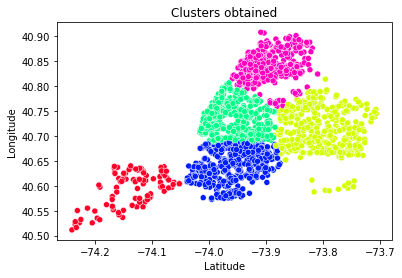

In [ ]:
seaborn.scatterplot(hello[:,1],hello[:,0], c=labels, cmap='gist_rainbow_r')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Clusters obtained")
plt.show()

In [ ]:
hi = df.values
hi = np.nan_to_num(hi)

SS = StandardScaler()
X_fit = SS.fit_transform(hi)

agglo_model = AgglomerativeClustering(n_clusters = 5,
                                      affinity = 'euclidean', 
                                      linkage = 'complete')
agglo_model.fit(hi)
labels = agglo_model.labels_

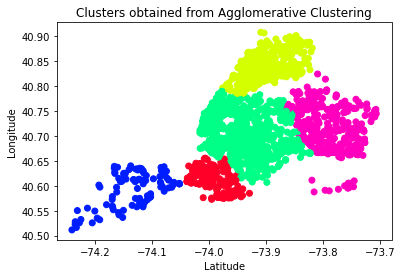

In [ ]:
plt.scatter(hi[:,1], hi[:,0], c=labels, cmap='gist_rainbow_r')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Clusters obtained from Agglomerative Clustering")
plt.show()

## Pattern Mining

In [ ]:
## Main Elements in Pattern Mining are going to be 
# 1. Contributing Factors
# 2. Vehicle Type
# 3. Time of the day ( Time Frames of 1 hour taken)
# 4. Number of Persons Killed
# 5. Pedestrian, Cyclist or Motorist killed

# This will help us look for Patterns like at what time of the day most accidents occur and what are corresponding reasons for it
# and also severity attached to these accidents - like what contributing factors cause more cyclist to kill something of that sort

### Data Pre-Processing

In [ ]:
## Tagging the data by hours - using these hour frames as an element in the Transactional Database
time_dict = {'0': '0-1', '1': '1-2', '2': '2-3', '3': '3-4', '4': '4-5', '5': '5-6', '6': '6-7', '7': '7-8', \
             '8': '8-9', '9': '9-10', '10': '10-11', '11': '11-12', '12': '12-13', '13': '13-14', '14': '14-15', \
            '15': '15-16', '16': '16-17', '17': '17-18', '18': '18-19', '19': '19-20', '20': '20-21', \
            '21': '21-22', '22': '22-23', '23': '23-0'}

def tag_hour_time(time_dict, time_instance):
  hour = time_instance.hour
  return time_dict[str(hour)]

data["TIME TAG (hours)"] = data["CRASH TIME"].apply(lambda x: tag_hour_time(time_dict, x))

In [ ]:
#Adding a year column for future use
data["CRASH YEAR"] = data["CRASH DATE"].apply(lambda x: str(x.year))

In [ ]:
#Labelling vehicles
data['VEHICLE TYPE CODE 1'] = data['VEHICLE TYPE CODE 1'].apply(lambda x: x + '_1' if x != 'unknown' else x)
data['VEHICLE TYPE CODE 2'] = data['VEHICLE TYPE CODE 2'].apply(lambda x: x + '_2' if x != 'unknown' else x)
data['VEHICLE TYPE CODE 3'] = data['VEHICLE TYPE CODE 3'].apply(lambda x: x + '_3' if x != 'unknown' else x)
data['VEHICLE TYPE CODE 4'] = data['VEHICLE TYPE CODE 4'].apply(lambda x: x + '_4' if x != 'unknown' else x)
data['VEHICLE TYPE CODE 5'] = data['VEHICLE TYPE CODE 5'].apply(lambda x: x + '_5' if x != 'unknown' else x)

In [ ]:
#Labelling the killed and injured to help in pattern mining
data = data.astype({'NUMBER OF PEDESTRIANS INJURED': str, 'NUMBER OF PEDESTRIANS KILLED': str, 'NUMBER OF CYCLIST INJURED': str, 'NUMBER OF CYCLIST KILLED': str, 'NUMBER OF MOTORIST INJURED': str, 'NUMBER OF MOTORIST KILLED': str, 'CRASH YEAR': str})
data['NUMBER OF PEDESTRIANS INJURED'] = data['NUMBER OF PEDESTRIANS INJURED'].apply(lambda x: 'PI_'+ x if x != '0' else 'unknown')
data['NUMBER OF PEDESTRIANS KILLED'] = data['NUMBER OF PEDESTRIANS KILLED'].apply(lambda x: 'PK_'+ x if x != '0' else 'unknown')
data['NUMBER OF CYCLIST INJURED'] = data['NUMBER OF CYCLIST INJURED'].apply(lambda x: 'CI_'+ x if x != '0' else 'unknown')
data['NUMBER OF CYCLIST KILLED'] = data['NUMBER OF CYCLIST KILLED'].apply(lambda x: 'CK_'+ x if x != '0' else 'unknown')
data['NUMBER OF MOTORIST INJURED'] = data['NUMBER OF MOTORIST INJURED'].apply(lambda x: 'MI_'+ x if x != '0' else 'unknown')
data['NUMBER OF MOTORIST KILLED'] = data['NUMBER OF MOTORIST KILLED'].apply(lambda x: 'MK_'+ x if x != '0' else 'unknown')

### Pattern Mining over the whole Dataset

In [ ]:
## Using Fp growth libraries for pattern mining
# We will be looking at all the Boroughs combined.
# It can be further divided into 
# 1. All Years combined
# 2. Year wise

#### Finding patterns with: time tags, contributing factors, and vehicle types involved in accidents

In [ ]:
dataset_fv = data[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3' , 'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5', 'TIME TAG (hours)']].copy()

In [ ]:
array_list = []

for i in range(0, len(dataset_fv)):
  x = list(dataset_fv.iloc[i])
  x = list(filter(lambda a: a != 'Unidentified', x))
  x = list(filter(lambda a: a != 'unknown', x))
  x = list(filter(lambda a: a != 'unspecified', x))
  array_list.append(x)

array_list_np = np.array(array_list, dtype=object)

In [ ]:
trans_code = TransactionEncoder()
trans_array = trans_code.fit(array_list_np).transform(array_list_np)
df = pd.DataFrame(trans_array, columns=trans_code.columns_)
df.head()

,(ceme_2,._2,0-1,0_1,0_2,1,1-2,10-11,11 pa_2,11-12,11-va_1,11111_1,12 fe_2,12 pa_1,12 pa_2,12' o_2,12-13,13-14,13_2,14-15,15 pa_1,15-16,16-17,16m_2,17-18,18 wheeler_1,18 wheeler_2,18-19,19-20,197209_1,1_1,1_2,1c_1,1s_1,2 doo_1,2 doo_2,2 dr_1,2 hor_2,2 ton_1,2 whe_1,...,waste_2,wc_2,well driller_1,well driller_2,wesco_2,wg_2,wh ford co_1,whbl_2,wheel barr_2,wheel_1,wheel_2,whit_1,white ambu_1,white_1,white_2,windshield inadequate,wineb_1,winne_1,work van_1,work_1,work_2,workh util_2,workh_1,workh_2,workm_1,yale_1,yamah_1,yello_1,yello_2,yello_3,yellow cab_1,yellowpowe_1,yll p_2,ynk_2,yps_2,yw po_1,yw_2,yy_1,omm_1,ï¿½mbu_1
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
start = time.time()
frequent_itemsets = fpgrowth(df, min_support=0.03, use_colnames=True)
finish = time.time()
print("FPGrowth Runtime: %.2f"% (finish-start), "seconds")

FPGrowth Runtime: 10.36 seconds


In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets[(frequent_itemsets['length'] > 2)])

     support                                           itemsets  length
43  0.030501  (sport utility / station wagon_1, driver inatt...       3
44  0.030742  (sport utility / station wagon_1, driver inatt...       3
45  0.030245  (driver inattention/distraction, sport utility...       3
46  0.046733  (driver inattention/distraction, sedan_2, seda...       3


In [ ]:
frequent_itemsets

,support,itemsets,length
0,0.261106,(sport utility / station wagon_2),1
1,0.055348,(12-13),1
2,0.043738,(taxi_1),1
3,0.340910,(sport utility / station wagon_1),1
4,0.072356,(16-17),1
5,0.072555,(failure to yield right-of-way),1
6,0.063785,(15-16),1
7,0.046107,(passing or lane usage improper),1
8,0.445906,(sedan_1),1
9,0.052153,(11-12),1


In [ ]:
frequent_itemsets.to_csv('freq_itemsets_overall.csv')

#### Finding patterns with: time tags, contributing factors, and vehicle types involved in accidents - including people injured and killed

In [ ]:
dataset_kfv = data[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED','CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3' , 'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5', 'TIME TAG (hours)']].copy()

In [ ]:
listx = []
for i in range(0, len(dataset_kfv)):
  x = list(dataset_kfv.iloc[i])
  x = list(filter(lambda a: a != 'Unidentified', x))
  x = list(filter(lambda a: a != 'unknown', x))
  x = list(filter(lambda a: a != 'unspecified', x))
  listx.append(x)

y = np.array(listx, dtype=object)

In [ ]:
trans_code = TransactionEncoder()
trans_array = trans_code.fit(y).transform(y)
df = pd.DataFrame(trans_array, columns=trans_code.columns_)
df.head()

,(ceme_2,._2,0-1,0_1,0_2,1,1-2,10-11,11 pa_2,11-12,11-va_1,11111_1,12 fe_2,12 pa_1,12 pa_2,12' o_2,12-13,13-14,13_2,14-15,15 pa_1,15-16,16-17,16m_2,17-18,18 wheeler_1,18 wheeler_2,18-19,19-20,197209_1,1_1,1_2,1c_1,1s_1,2 doo_1,2 doo_2,2 dr_1,2 hor_2,2 ton_1,2 whe_1,...,waste_2,wc_2,well driller_1,well driller_2,wesco_2,wg_2,wh ford co_1,whbl_2,wheel barr_2,wheel_1,wheel_2,whit_1,white ambu_1,white_1,white_2,windshield inadequate,wineb_1,winne_1,work van_1,work_1,work_2,workh util_2,workh_1,workh_2,workm_1,yale_1,yamah_1,yello_1,yello_2,yello_3,yellow cab_1,yellowpowe_1,yll p_2,ynk_2,yps_2,yw po_1,yw_2,yy_1,omm_1,ï¿½mbu_1
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
start = time.time()
frequent_itemsets= fpgrowth(df, min_support=0.03, use_colnames=True)
finish = time.time()
print("FPGrowth Runtime: %.2f"% (finish-start), "seconds")

FPGrowth Runtime: 10.77 seconds


In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets[(frequent_itemsets['length'] > 2)])

     support                                           itemsets  length
45  0.030501  (sport utility / station wagon_1, driver inatt...       3
46  0.030742  (sport utility / station wagon_1, driver inatt...       3
47  0.030245  (driver inattention/distraction, sport utility...       3
48  0.046733  (driver inattention/distraction, sedan_2, seda...       3


In [ ]:
frequent_itemsets

,support,itemsets,length
0,0.261106,(sport utility / station wagon_2),1
1,0.055348,(12-13),1
2,0.043738,(taxi_1),1
3,0.340910,(sport utility / station wagon_1),1
4,0.072356,(16-17),1
5,0.072555,(failure to yield right-of-way),1
6,0.063785,(15-16),1
7,0.046107,(passing or lane usage improper),1
8,0.445906,(sedan_1),1
9,0.052153,(11-12),1


In [ ]:
frequent_itemsets.to_csv('freq_itemsets_overall_injured_killed.csv')

#### Finding yearly patterns with: time tags, contributing factors, and vehicle types involved in accidents

Do we see any different patterns across years?

##### 2013

In [ ]:
thirteen_df = data[data['CRASH DATE'].dt.year == 2013]
new_data = thirteen_df[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED','CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3' , 'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5', 'TIME TAG (hours)']].copy()

In [ ]:
listx = []
for i in range(0, len(new_data)):
  x = list(new_data.iloc[i])
  x = list(filter(lambda a: a != 'Unidentified', x))
  x = list(filter(lambda a: a != 'unknown', x))
  x = list(filter(lambda a: a != 'unspecified', x))
  listx.append(x)

y = np.array(listx, dtype=object)

In [ ]:
trans_code = TransactionEncoder()
trans_array = trans_code.fit(y).transform(y)
df = pd.DataFrame(trans_array, columns=trans_code.columns_)
df.head()

,0-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,2-3,20-21,21-22,22-23,23-0,3-4,4-5,5-6,6-7,7-8,8-9,9-10,CI_1,MI_1,MI_2,MI_3,MI_4,MI_5,MI_7,PI_1,aggressive driving/road rage,alcohol involvement,backing unsafely,bicycle_2,brakes defective,bus_1,bus_2,bus_3,...,motorcycle_1,motorcycle_2,obstruction/debris,other electronic device,other lighting defects,other vehicular,other_1,other_2,other_3,outside car distraction,oversized vehicle,passenger distraction,passenger vehicle_1,passenger vehicle_2,passenger vehicle_3,passenger vehicle_4,passenger vehicle_5,pavement defective,pavement slippery,physical disability,pick-up truck_1,pick-up truck_2,pick-up truck_3,prescription medication,small com veh(4 tires) _1,small com veh(4 tires) _2,sport utility / station wagon_1,sport utility / station wagon_2,sport utility / station wagon_3,steering failure,taxi_1,taxi_2,taxi_3,tire failure/inadequate,traffic control disregarded,turning improperly,unsafe speed,van_1,van_2,view obstructed/limited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
start = time.time()
frequent_itemsets= fpgrowth(df, min_support=0.03, use_colnames=True)
finish = time.time()
print("FPGrowth Runtime: %.2f"% (finish-start), "seconds")

FPGrowth Runtime: 0.01 seconds


In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets[(frequent_itemsets['length'] > 2)])

     support                                           itemsets  length
47  0.031704  (fatigued/drowsy, passenger vehicle_2, passeng...       3


In [ ]:
frequent_itemsets

,support,itemsets,length
0,0.058124,(8-9),1
1,0.611625,(passenger vehicle_1),1
2,0.430647,(passenger vehicle_2),1
3,0.066050,(19-20),1
4,0.175694,(sport utility / station wagon_1),1
5,0.052840,(18-19),1
6,0.157199,(sport utility / station wagon_2),1
7,0.043593,(10-11),1
8,0.101717,(driver inattention/distraction),1
9,0.084544,(MI_1),1


In [ ]:
frequent_itemsets.to_csv('freq_itemsets_overall_2013.csv')

##### 2014

In [ ]:
fourteen_df = data[data['CRASH DATE'].dt.year == 2014]
new_data = fourteen_df[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED','CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3' , 'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5', 'TIME TAG (hours)']].copy()

In [ ]:
listx = []
for i in range(0, len(new_data)):
  x = list(new_data.iloc[i])
  x = list(filter(lambda a: a != 'Unidentified', x))
  x = list(filter(lambda a: a != 'unknown', x))
  x = list(filter(lambda a: a != 'unspecified', x))
  listx.append(x)

y = np.array(listx, dtype=object)

In [ ]:
trans_code = TransactionEncoder()
trans_array = trans_code.fit(y).transform(y)
df = pd.DataFrame(trans_array, columns=trans_code.columns_)
df.head()

,0-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,2-3,20-21,21-22,22-23,23-0,3-4,4-5,5-6,6-7,7-8,8-9,9-10,CI_1,MI_1,MI_2,MI_3,MI_5,MI_6,MK_2,PI_1,PI_2,accelerator defective,aggressive driving/road rage,alcohol involvement,ambulance_1,ambulance_2,animals action,backing unsafely,...,motorcycle_1,motorcycle_2,obstruction/debris,other electronic device,other vehicular,other_1,other_2,other_3,outside car distraction,oversized vehicle,passenger distraction,passenger vehicle_1,passenger vehicle_2,passenger vehicle_3,passenger vehicle_4,pavement defective,pavement slippery,physical disability,pick-up truck_1,pick-up truck_2,prescription medication,reaction to other uninvolved vehicle,small com veh(4 tires) _1,small com veh(4 tires) _2,sport utility / station wagon_1,sport utility / station wagon_2,sport utility / station wagon_3,sport utility / station wagon_4,steering failure,taxi_1,taxi_2,taxi_3,tire failure/inadequate,traffic control disregarded,turning improperly,unsafe speed,van_1,van_2,van_3,view obstructed/limited
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
start = time.time()
frequent_itemsets= fpgrowth(df, min_support=0.03, use_colnames=True)
finish = time.time()
print("FPGrowth Runtime: %.2f"% (finish-start), "seconds")

FPGrowth Runtime: 0.02 seconds


In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets[(frequent_itemsets['length'] > 2)])

     support                                           itemsets  length
41  0.032415  (fatigued/drowsy, passenger vehicle_2, passeng...       3


In [ ]:
frequent_itemsets

,support,itemsets,length
0,0.564830,(passenger vehicle_1),1
1,0.378444,(passenger vehicle_2),1
2,0.078606,(17-18),1
3,0.077796,(15-16),1
4,0.179903,(sport utility / station wagon_1),1
5,0.075365,(driver inattention/distraction),1
6,0.053485,(PI_1),1
7,0.048622,(9-10),1
8,0.131280,(sport utility / station wagon_2),1
9,0.047812,(turning improperly),1


In [ ]:
frequent_itemsets.to_csv('freq_itemsets_overall_2014.csv')

##### 2015

In [ ]:
fifteen_df = data[data['CRASH DATE'].dt.year == 2015]
new_data = fifteen_df[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED','CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3' , 'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5', 'TIME TAG (hours)']].copy()

In [ ]:
listx = []
for i in range(0, len(new_data)):
  x = list(new_data.iloc[i])
  x = list(filter(lambda a: a != 'Unidentified', x))
  x = list(filter(lambda a: a != 'unknown', x))
  x = list(filter(lambda a: a != 'unspecified', x))
  listx.append(x)

y = np.array(listx, dtype=object)

In [ ]:
trans_code = TransactionEncoder()
trans_array = trans_code.fit(y).transform(y)
df = pd.DataFrame(trans_array, columns=trans_code.columns_)
df.head()

,0-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,2-3,20-21,21-22,22-23,23-0,3-4,4-5,5-6,6-7,7-8,8-9,9-10,CI_1,CI_2,MI_1,MI_10,MI_11,MI_12,MI_2,MI_3,MI_4,MI_5,MI_6,MI_7,MI_8,MI_9,MK_1,MK_2,...,pick-up truck_4,pick-up truck_5,prescription medication,reaction to other uninvolved vehicle,scooter_1,scooter_2,scooter_3,sedan_1,sedan_2,shoulders defective/improper,small com veh(4 tires) _1,small com veh(4 tires) _2,small com veh(4 tires) _3,small com veh(4 tires) _4,sport utility / station wagon_1,sport utility / station wagon_2,sport utility / station wagon_3,sport utility / station wagon_4,sport utility / station wagon_5,steering failure,taxi_1,taxi_2,taxi_3,taxi_4,taxi_5,tire failure/inadequate,tow hitch defective,tractor truck diesel_1,traffic control device improper/non-working,traffic control disregarded,turning improperly,unsafe lane changing,unsafe speed,van_1,van_2,van_3,van_4,van_5,view obstructed/limited,windshield inadequate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [ ]:
start = time.time()
frequent_itemsets= fpgrowth(df, min_support=0.03, use_colnames=True)
finish = time.time()
print("FPGrowth Runtime: %.2f"% (finish-start), "seconds")

FPGrowth Runtime: 0.36 seconds


In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets[(frequent_itemsets['length'] > 2)])

     support                                           itemsets  length
46  0.036799  (driver inattention/distraction, passenger veh...       3


In [ ]:
frequent_itemsets

,support,itemsets,length
0,0.510483,(passenger vehicle_1),1
1,0.058647,(9-10),1
2,0.037293,(turning improperly),1
3,0.085757,(fatigued/drowsy),1
4,0.059506,(15-16),1
5,0.197207,(sport utility / station wagon_2),1
6,0.068958,(16-17),1
7,0.391837,(passenger vehicle_2),1
8,0.074866,(MI_1),1
9,0.072911,(17-18),1


In [ ]:
frequent_itemsets.to_csv('freq_itemsets_overall_2015.csv')

##### 2016

In [ ]:
sixteen_df = data[data['CRASH DATE'].dt.year == 2016]
new_data = sixteen_df[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED','CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3' , 'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5', 'TIME TAG (hours)']].copy()

In [ ]:
listx = []
for i in range(0, len(new_data)):
  x = list(new_data.iloc[i])
  x = list(filter(lambda a: a != 'Unidentified', x))
  x = list(filter(lambda a: a != 'unknown', x))
  x = list(filter(lambda a: a != 'unspecified', x))
  listx.append(x)

y = np.array(listx, dtype=object)

In [ ]:
trans_code = TransactionEncoder()
trans_array = trans_code.fit(y).transform(y)
df = pd.DataFrame(trans_array, columns=trans_code.columns_)
df.head()

,0-1,0_2,1,1-2,10-11,11-12,11111_1,12 pa_2,12' o_2,12-13,13-14,14-15,15 pa_1,15-16,16-17,17-18,18-19,19-20,1_1,2 doo_1,2 doo_2,2 dr_1,2 whe_1,2-3,20-21,2000_1,2003_2,2015_2,21-22,22-23,23-0,250-3_1,26 ft_1,2dr_2,3 whe_1,3-4,3-door_1,3-door_2,3-door_3,3-door_4,...,van w_1,van/_2,van/r_2,van/t_1,van/t_2,van_1,van_2,van_3,van_4,van_5,vanet_1,vanette_1,vanette_2,vas_2,vehic_2,vehicle vandalism,vend_2,veriz_1,view obstructed/limited,vn_2,wagon_1,wagon_2,waste_2,well driller_1,well driller_2,wg_2,whit_1,white_1,white_2,windshield inadequate,winne_1,work_1,work_2,workh_2,yale_1,yello_1,ynk_2,yps_2,yw_2,yy_1
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
start = time.time()
frequent_itemsets= fpgrowth(df, min_support=0.03, use_colnames=True)
finish = time.time()
print("FPGrowth Runtime: %.2f"% (finish-start), "seconds")

FPGrowth Runtime: 1.93 seconds


In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets[(frequent_itemsets['length'] > 2)])

     support                                           itemsets  length
43  0.051038  (driver inattention/distraction, sedan_2, seda...       3


In [ ]:
frequent_itemsets

,support,itemsets,length
0,0.468143,(sedan_1),1
1,0.353252,(sedan_2),1
2,0.049739,(10-11),1
3,0.047712,(backing unsafely),1
4,0.301331,(sport utility / station wagon_1),1
5,0.234171,(driver inattention/distraction),1
6,0.056980,(13-14),1
7,0.053466,(9-10),1
8,0.030213,(turning improperly),1
9,0.237366,(sport utility / station wagon_2),1


In [ ]:
frequent_itemsets.to_csv('freq_itemsets_overall_2016.csv')

##### 2017

In [ ]:
seventeen_df = data[data['CRASH DATE'].dt.year == 2017]
new_data = seventeen_df[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED','CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3' , 'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5', 'TIME TAG (hours)']].copy()

In [ ]:
listx = []
for i in range(0, len(new_data)):
  x = list(new_data.iloc[i])
  x = list(filter(lambda a: a != 'Unidentified', x))
  x = list(filter(lambda a: a != 'unknown', x))
  x = list(filter(lambda a: a != 'unspecified', x))
  listx.append(x)

y = np.array(listx, dtype=object)

In [ ]:
trans_code = TransactionEncoder()
trans_array = trans_code.fit(y).transform(y)
df = pd.DataFrame(trans_array, columns=trans_code.columns_)
df.head()

,._2,0-1,0_2,1-2,10-11,11-12,11-va_1,12 fe_2,12 pa_1,12-13,13-14,14-15,15 pa_1,15-16,16-17,17-18,18 wheeler_1,18 wheeler_2,18-19,19-20,1_1,1s_1,2-3,20-21,21-22,22-23,23-0,3 doo_1,3 whe_2,3-4,3-door_1,3-door_2,3-whe_2,315 e_1,3door_1,4 axe_1,4 run_1,4-5,4d_1,4dr_1,...,van camper_2,van h_2,van truck_1,van truck_2,van/t_1,van_1,van_2,van_3,van_4,van_5,vanette_1,vanette_2,vanette_3,vang_1,vav_1,vav_2,vehicle vandalism,veriz_1,vespa_1,view obstructed/limited,vms sign_2,vpg_1,wagon_1,wagon_2,wanc_2,waste_2,well driller_1,well driller_2,wesco_2,white_1,white_2,windshield inadequate,winne_1,work_1,workm_1,yamah_1,yello_1,yello_2,yll p_2,yw po_1
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
start = time.time()
frequent_itemsets= fpgrowth(df, min_support=0.03, use_colnames=True)
finish = time.time()
print("FPGrowth Runtime: %.2f"% (finish-start), "seconds")

FPGrowth Runtime: 2.15 seconds


In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets[(frequent_itemsets['length'] > 2)])

     support                                           itemsets  length
49  0.052037  (driver inattention/distraction, sedan_2, seda...       3
50  0.031735  (sport utility / station wagon_1, driver inatt...       3
51  0.032047  (driver inattention/distraction, sport utility...       3


In [ ]:
frequent_itemsets

,support,itemsets,length
0,0.490725,(sedan_1),1
1,0.371106,(sedan_2),1
2,0.109248,(following too closely),1
3,0.063535,(15-16),1
4,0.264291,(sport utility / station wagon_2),1
5,0.085876,(MI_1),1
6,0.050501,(10-11),1
7,0.334618,(sport utility / station wagon_1),1
8,0.052345,(11-12),1
9,0.056085,(8-9),1


In [ ]:
frequent_itemsets.to_csv('freq_itemsets_overall_2017.csv')

##### 2018

In [ ]:
eighteen_df = data[data['CRASH DATE'].dt.year == 2018]
new_data = eighteen_df[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED','CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3' , 'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5', 'TIME TAG (hours)']].copy()

In [ ]:
listx = []
for i in range(0, len(new_data)):
  x = list(new_data.iloc[i])
  x = list(filter(lambda a: a != 'Unidentified', x))
  x = list(filter(lambda a: a != 'unknown', x))
  x = list(filter(lambda a: a != 'unspecified', x))
  listx.append(x)

y = np.array(listx, dtype=object)

In [ ]:
trans_code = TransactionEncoder()
trans_array = trans_code.fit(y).transform(y)
df = pd.DataFrame(trans_array, columns=trans_code.columns_)
df.head()

,(ceme_2,0-1,0_2,1-2,10-11,11-12,12 pa_1,12-13,13-14,13_2,14-15,15 pa_1,15-16,16-17,17-18,18 wheeler_2,18-19,19-20,1_2,2 doo_2,2 ton_1,2- to_1,2-3,20-21,21-22,22-23,23-0,2ton_2,3 whe_1,3-4,3-door_1,3-door_2,3-door_3,3dc-_1,4-5,4whee_1,5-6,6-7,7-8,8-9,...,van camper_2,van f_2,van truck_1,van truck_2,van w_1,van/b_1,van/t_1,van/t_2,van_1,van_2,van_3,van_4,van_5,van`_2,vanette_1,vanette_2,vant_2,veh l_2,vehicle vandalism,veriz_1,veriz_3,view obstructed/limited,vol_2,wagon_1,wagon_2,wc_2,well driller_1,well driller_2,whbl_2,wheel_1,white_1,white_2,windshield inadequate,winne_1,work_1,work_2,workh_1,yello_1,yello_2,yello_3
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
start = time.time()
frequent_itemsets= fpgrowth(df, min_support=0.03, use_colnames=True)
finish = time.time()
print("FPGrowth Runtime: %.2f"% (finish-start), "seconds")

FPGrowth Runtime: 2.12 seconds


In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets[(frequent_itemsets['length'] > 2)])

     support                                           itemsets  length
45  0.034228  (sport utility / station wagon_1, driver inatt...       3
46  0.034634  (sport utility / station wagon_1, driver inatt...       3
47  0.033339  (driver inattention/distraction, sport utility...       3
48  0.048164  (driver inattention/distraction, sedan_2, seda...       3


In [ ]:
frequent_itemsets

,support,itemsets,length
0,0.280887,(sport utility / station wagon_2),1
1,0.055674,(12-13),1
2,0.050444,(taxi_1),1
3,0.357760,(sport utility / station wagon_1),1
4,0.073708,(16-17),1
5,0.076381,(failure to yield right-of-way),1
6,0.065986,(15-16),1
7,0.052020,(passing or lane usage improper),1
8,0.460354,(sedan_1),1
9,0.052202,(11-12),1


In [ ]:
frequent_itemsets.to_csv('freq_itemsets_overall_2018.csv')

##### 2019

In [ ]:
nineteen_df = data[data['CRASH DATE'].dt.year == 2019]
new_data = nineteen_df[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED','CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3' , 'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5', 'TIME TAG (hours)']].copy()

In [ ]:
listx = []
for i in range(0, len(new_data)):
  x = list(new_data.iloc[i])
  x = list(filter(lambda a: a != 'Unidentified', x))
  x = list(filter(lambda a: a != 'unknown', x))
  x = list(filter(lambda a: a != 'unspecified', x))
  listx.append(x)

y = np.array(listx, dtype=object)

In [ ]:
trans_code = TransactionEncoder()
trans_array = trans_code.fit(y).transform(y)
df = pd.DataFrame(trans_array, columns=trans_code.columns_)
df.head()

,0-1,0_2,1-2,10-11,11 pa_2,11-12,12-13,13-14,14-15,15-16,16-17,16m_2,17-18,18-19,19-20,197209_1,2 hor_2,2-3,20-21,2015_1,21-22,22-23,23-0,3 whe_1,3-4,3-door_1,3-door_2,3-door_3,35 ft_1,38ab-_3,4-5,5-6,52? t_2,6-7,7-8,72000_2,8-9,9-10,CI_1,CI_2,...,utility_2,van (_1,van (_2,van a_2,van c_2,van camper_1,van camper_2,van truck_1,van truck_2,van/t_1,van/t_2,van_1,van_2,van_3,van_4,van_5,vanette_1,vanette_2,vav_1,vehicle vandalism,vespa_1,vespa_2,view obstructed/limited,vms t_2,wagon_1,wagon_2,wagon_5,waste_2,well driller_1,wheel_2,white_1,white_2,windshield inadequate,wineb_1,work_2,yello_1,yello_2,yellowpowe_1,omm_1,ï¿½mbu_1
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
start = time.time()
frequent_itemsets= fpgrowth(df, min_support=0.03, use_colnames=True)
finish = time.time()
print("FPGrowth Runtime: %.2f"% (finish-start), "seconds")

FPGrowth Runtime: 1.94 seconds


In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets[(frequent_itemsets['length'] > 2)])

     support                                           itemsets  length
40  0.046699  (driver inattention/distraction, sedan_2, seda...       3
41  0.036150  (sport utility / station wagon_1, driver inatt...       3
42  0.036424  (driver inattention/distraction, sport utility...       3
43  0.038396  (sport utility / station wagon_1, driver inatt...       3


In [ ]:
frequent_itemsets

,support,itemsets,length
0,0.448275,(sedan_1),1
1,0.068313,(14-15),1
2,0.046505,(PI_1),1
3,0.329848,(sedan_2),1
4,0.035317,(21-22),1
5,0.275395,(driver inattention/distraction),1
6,0.069864,(17-18),1
7,0.377559,(sport utility / station wagon_1),1
8,0.100737,(following too closely),1
9,0.058620,(13-14),1


In [ ]:
frequent_itemsets.to_csv('freq_itemsets_overall_2019.csv')

##### 2020

In [ ]:
twenty_df = data[data['CRASH DATE'].dt.year == 2020]
new_data = twenty_df[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED','CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3' , 'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5', 'TIME TAG (hours)']].copy()

In [ ]:
listx = []
for i in range(0, len(new_data)):
  x = list(new_data.iloc[i])
  x = list(filter(lambda a: a != 'Unidentified', x))
  x = list(filter(lambda a: a != 'unknown', x))
  x = list(filter(lambda a: a != 'unspecified', x))
  listx.append(x)

y = np.array(listx, dtype=object)

In [ ]:
trans_code = TransactionEncoder()
trans_array = trans_code.fit(y).transform(y)
df = pd.DataFrame(trans_array, columns=trans_code.columns_)
df.head()

,0-1,0_1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18 wheeler_1,18 wheeler_2,18-19,19-20,1c_1,2-3,20-21,21-22,22-23,23-0,3-4,3-door_1,3-door_2,3-door_3,4-5,4dsd_2,5-6,6-7,600aj_2,7-8,7532433_1,8-9,9-10,CI_1,CI_2,CI_3,CK_1,MI_1,MI_10,...,usps mail_3,usps posta_1,usps posta_2,"usps truc,_1",usps truck_1,usps truck_2,usps van_1,usps van_2,usps/govt_1,usps_1,usps_2,utility_1,utility_2,van camper_1,van camper_2,van ford_5,van truck_1,van truck_3,van/transi_2,van/truck_1,van_1,van_2,van_3,van_4,van_5,vanette_1,vanette_2,vehicle 2_2,vehicle vandalism,vendor cha_2,view obstructed/limited,vms_1,well driller_2,wh ford co_1,wheel barr_2,white ambu_1,windshield inadequate,work van_1,workh util_2,yellow cab_1
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
start = time.time()
frequent_itemsets= fpgrowth(df, min_support=0.03, use_colnames=True)
finish = time.time()
print("FPGrowth Runtime: %.2f"% (finish-start), "seconds")

FPGrowth Runtime: 1.58 seconds


In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets[(frequent_itemsets['length'] > 2)])

     support                                           itemsets  length
44  0.030015  (sport utility / station wagon_1, driver inatt...       3
45  0.045488  (driver inattention/distraction, sedan_2, seda...       3
49  0.030804  (sport utility / station wagon_1, driver inatt...       3


In [ ]:
frequent_itemsets

,support,itemsets,length
0,0.469156,(sedan_1),1
1,0.303182,(sedan_2),1
2,0.050152,(11-12),1
3,0.039343,(MI_2),1
4,0.066583,(17-18),1
...,...,...,...
56,0.032152,"(following too closely, sedan_2)",2
57,0.030857,"(sport utility / station wagon_1, following to...",2
58,0.034316,"(following too closely, sedan_1)",2
59,0.030733,"(failure to yield right-of-way, sedan_1)",2


In [ ]:
frequent_itemsets.to_csv('freq_itemsets_overall_2020.csv')

##### 2021

In [ ]:
twentyone_df = data[data['CRASH DATE'].dt.year == 2021]
new_data = twentyone_df[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED','CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3' , 'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5', 'TIME TAG (hours)']].copy()

In [ ]:
listx = []
for i in range(0, len(new_data)):
  x = list(new_data.iloc[i])
  x = list(filter(lambda a: a != 'Unidentified', x))
  x = list(filter(lambda a: a != 'unknown', x))
  x = list(filter(lambda a: a != 'unspecified', x))
  listx.append(x)

y = np.array(listx, dtype=object)

In [ ]:
trans_code = TransactionEncoder()
trans_array = trans_code.fit(y).transform(y)
df = pd.DataFrame(trans_array, columns=trans_code.columns_)
df.head()

,0-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,2-3,20-21,21-22,22-23,23-0,3-4,3-door_1,4-5,5-6,6-7,7-8,8-9,9-10,CI_1,CI_2,CK_1,MI_1,MI_2,MI_3,MI_4,MI_5,MI_6,MI_7,MI_8,MK_1,MK_2,PI_1,PI_2,...,steering failure,suburban_1,tanker_1,tanker_2,tanker_3,taxi_1,taxi_2,taxi_3,taxi_4,taxi_5,tinted windows,tire failure/inadequate,tow hitch defective,tow truck / wrecker_1,tow truck / wrecker_2,tow truck_1,trac_1,tractor tr_2,tractor truck diesel_1,tractor truck diesel_2,tractor truck diesel_3,tractor truck gasoline_1,tractor truck gasoline_2,traffic control device improper/non-working,traffic control disregarded,trailer_1,trailer_5,truck trai_1,truck_1,truck_3,turning improperly,unsafe lane changing,unsafe speed,usps truck_2,utility_1,van camper_1,van_1,van_2,van_3,view obstructed/limited
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
start = time.time()
frequent_itemsets= fpgrowth(df, min_support=0.03, use_colnames=True)
finish = time.time()
print("FPGrowth Runtime: %.2f"% (finish-start), "seconds")

FPGrowth Runtime: 0.06 seconds


In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets[(frequent_itemsets['length'] > 2)])

     support                                           itemsets  length
38  0.033593                           (MI_1, sedan_2, sedan_1)       3
46  0.041370  (driver inattention/distraction, sedan_2, seda...       3


In [ ]:
frequent_itemsets

,support,itemsets,length
0,0.479398,(sedan_1),1
1,0.139831,(MI_1),1
2,0.056760,(12-13),1
3,0.296376,(sedan_2),1
4,0.059904,(17-18),1
5,0.054112,(sedan_3),1
6,0.036902,(CI_1),1
7,0.060731,(18-19),1
8,0.254178,(driver inattention/distraction),1
9,0.040377,(21-22),1


In [ ]:
frequent_itemsets.to_csv('freq_itemsets_overall_2021.csv')

### Borough Wise Pattern Mining

We will be looking at individual Boroughs now to discover patterns that might be particular to each borough

#### Bronx

In [ ]:
bronx_df = data[data["BOROUGH"] == "BRONX"]

##### Finding patterns with: time tags, contributing factors, and vehicle types involved in accidents - including people injured and killed

In [ ]:
new_data = bronx_df[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3' , 'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5', 'TIME TAG (hours)']].copy()

In [ ]:
listx = []
for i in range(0, len(new_data)):
  x = list(new_data.iloc[i])
  x = list(filter(lambda a: a != 'Unidentified', x))
  x = list(filter(lambda a: a != 'unknown', x))
  x = list(filter(lambda a: a != 'unspecified', x))
  listx.append(x)
y = np.array(listx, dtype=object)

In [ ]:
trans_code = TransactionEncoder()
trans_array = trans_code.fit(y).transform(y)
df = pd.DataFrame(trans_array, columns=trans_code.columns_)
df.head()

,0-1,0_2,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,197209_1,1s_1,2 doo_1,2-3,20-21,21-22,22-23,23-0,3-4,3-door_1,3-door_2,3-whe_1,315 e_1,35 ft_1,38ab-_3,3door_1,4-5,5-6,6-7,7-8,8-9,80,9-10,CI_1,CI_2,CI_3,CK_1,...,unsafe speed,us postal_1,us postal_2,using on board navigation device,uspcs truc_2,usps #7530_1,usps posta_1,usps truck_2,usps2_1,usps_1,usps_2,utility_1,utility_2,van camper_1,van camper_2,van truck_1,van truck_2,van truck_3,van_1,van_2,van_3,van_4,vanette_1,vanette_2,vehicle vandalism,view obstructed/limited,wagon_2,waste_2,wc_2,wh ford co_1,wheel_1,white_1,windshield inadequate,winne_1,work_1,work_2,workh_1,yale_1,yello_1,yello_2
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
start=time.time()
frequentItemsets= fpgrowth(df, min_support=0.03, use_colnames=True)
finish=time.time()
print("FPGrowth Runtime: %.2f"% (finish-start), "seconds")

FPGrowth Runtime: 0.94 seconds


In [ ]:
frequentItemsets['length'] = frequentItemsets['itemsets'].apply(lambda x: len(x))
print(frequentItemsets[(frequentItemsets['length'] > 2)])

     support                                           itemsets  length
42  0.038258  (driver inattention/distraction, sedan_2, seda...       3


In [ ]:
frequentItemsets

,support,itemsets,length
0,0.469871,(sedan_1),1
1,0.058224,(13-14),1
2,0.032082,(turning improperly),1
3,0.050923,(11-12),1
4,0.047187,(passing too closely),1
5,0.075306,(16-17),1
6,0.058300,(backing unsafely),1
7,0.233531,(sport utility / station wagon_2),1
8,0.070605,(17-18),1
9,0.319316,(sedan_2),1


In [ ]:
frequentItemsets.to_csv('freq_itemsets_bronx_overall_injured_killed.csv')

##### Finding patterns with: time tags, contributing factors, and vehicle types involved in accidents 



In [ ]:
new_reasons = new_data[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3' , 'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5', 'TIME TAG (hours)']].copy()

In [ ]:
listx = []
for i in range(0, len(new_reasons)):
  x = list(new_reasons.iloc[i])
  x = list(filter(lambda a: a != 'Unidentified', x))
  x = list(filter(lambda a: a != 'unknown', x))
  x = list(filter(lambda a: a != 'unspecified', x))
  listx.append(x)
y = np.array(listx, dtype=object)

In [ ]:
trans_code = TransactionEncoder()
trans_array = trans_code.fit(y).transform(y)
df = pd.DataFrame(trans_array, columns=trans_code.columns_)
df.head()

,0-1,0_2,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,197209_1,1s_1,2 doo_1,2-3,20-21,21-22,22-23,23-0,3-4,3-door_1,3-door_2,3-whe_1,315 e_1,35 ft_1,38ab-_3,3door_1,4-5,5-6,6-7,7-8,8-9,80,9-10,accelerator defective,acces_1,acces_2,aggressive driving/road rage,...,unsafe speed,us postal_1,us postal_2,using on board navigation device,uspcs truc_2,usps #7530_1,usps posta_1,usps truck_2,usps2_1,usps_1,usps_2,utility_1,utility_2,van camper_1,van camper_2,van truck_1,van truck_2,van truck_3,van_1,van_2,van_3,van_4,vanette_1,vanette_2,vehicle vandalism,view obstructed/limited,wagon_2,waste_2,wc_2,wh ford co_1,wheel_1,white_1,windshield inadequate,winne_1,work_1,work_2,workh_1,yale_1,yello_1,yello_2
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
start=time.time()
frequentItemsets= fpgrowth(df, min_support=0.05, use_colnames=True)
finish=time.time()
print("FPGrowth Runtime: %.2f"% (finish-start), "seconds")

FPGrowth Runtime: 0.81 seconds


In [ ]:
frequentItemsets['length'] = frequentItemsets['itemsets'].apply(lambda x: len(x))
frequentItemsets[(frequentItemsets['length'] >= 1)]

,support,itemsets,length
0,0.469871,(sedan_1),1
1,0.058224,(13-14),1
2,0.050923,(11-12),1
3,0.075306,(16-17),1
4,0.058300,(backing unsafely),1
5,0.233531,(sport utility / station wagon_2),1
6,0.070605,(17-18),1
7,0.319316,(sedan_2),1
8,0.190553,(driver inattention/distraction),1
9,0.061535,(18-19),1


In [ ]:
frequentItemsets.to_csv('freq_itemsets_bronx_overallyears.csv')

#### Brooklyn

In [ ]:
brooklyn_df = data[data["BOROUGH"] == "BROOKLYN"]

##### Finding patterns with: time tags, contributing factors, and vehicle types involved in accidents - including the injured and killed


In [ ]:
new_data = brooklyn_df[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3' , 'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5', 'TIME TAG (hours)']].copy()

In [ ]:
listx = []
for i in range(0, len(new_data)):
  x = list(new_data.iloc[i])
  x = list(filter(lambda a: a != 'Unidentified', x))
  x = list(filter(lambda a: a != 'unknown', x))
  x = list(filter(lambda a: a != 'unspecified', x))
  listx.append(x)
y = np.array(listx, dtype=object)

In [ ]:
trans_code = TransactionEncoder()
trans_array = trans_code.fit(y).transform(y)
df = pd.DataFrame(trans_array, columns=trans_code.columns_)
df.head()

,(ceme_2,0-1,0_2,1,1-2,10-11,11-12,11111_1,12 pa_1,12' o_2,12-13,13-14,14-15,15 pa_1,15-16,16-17,17-18,18 wheeler_1,18 wheeler_2,18-19,19-20,2 dr_1,2 whe_1,2- to_1,2-3,20-21,2015_2,21-22,22-23,23-0,3 doo_1,3 whe_1,3-4,3-door_1,3-door_2,4 axe_1,4-5,430_2,5-6,6-7,...,van e_1,van ford_5,van truck_1,van truck_2,van/t_1,van/t_2,van/truck_1,van_1,van_2,van_3,van_4,van_5,vanet_1,vanette_1,vas_2,vehic_2,vehicle vandalism,vespa_2,view obstructed/limited,vms t_2,vn_2,wagon_1,wagon_2,wanc_2,well driller_1,well driller_2,wesco_2,wheel barr_2,white ambu_1,white_1,white_2,windshield inadequate,work van_1,work_1,work_2,yello_1,yello_2,yw po_1,yw_2,ï¿½mbu_1
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
start=time.time()
frequentItemsets= fpgrowth(df, min_support=0.03, use_colnames=True)
finish=time.time()
print("FPGrowth Runtime: %.2f"% (finish-start), "seconds")

FPGrowth Runtime: 1.89 seconds


In [ ]:
frequentItemsets['length'] = frequentItemsets['itemsets'].apply(lambda x: len(x))
print(frequentItemsets[(frequentItemsets['length'] > 2)])

     support                                           itemsets  length
41  0.043099  (driver inattention/distraction, sedan_2, seda...       3


In [ ]:
frequentItemsets

,support,itemsets,length
0,0.344919,(sport utility / station wagon_1),1
1,0.080391,(failure to yield right-of-way),1
2,0.066065,(15-16),1
3,0.040869,(passing or lane usage improper),1
4,0.033359,(CI_1),1
5,0.462921,(sedan_1),1
6,0.054686,(11-12),1
7,0.324753,(sedan_2),1
8,0.041577,(20-21),1
9,0.250146,(sport utility / station wagon_2),1


In [ ]:
frequentItemsets.to_csv('freq_itemsets_brooklyn_overall_injured_killed.csv')

##### Finding patterns with: time tags, contributing factors, and vehicle types involved in accidents 

In [ ]:
new_reasons = new_data[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3' , 'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5', 'TIME TAG (hours)']].copy()

In [ ]:
listx = []
for i in range(0, len(new_reasons)):
  x = list(new_reasons.iloc[i])
  x = list(filter(lambda a: a != 'Unidentified', x))
  x = list(filter(lambda a: a != 'unknown', x))
  x = list(filter(lambda a: a != 'unspecified', x))
  listx.append(x)
y = np.array(listx, dtype=object)

In [ ]:
trans_code = TransactionEncoder()
trans_array = trans_code.fit(y).transform(y)
df = pd.DataFrame(trans_array, columns=trans_code.columns_)
df.head()

,(ceme_2,0-1,0_2,1,1-2,10-11,11-12,11111_1,12 pa_1,12' o_2,12-13,13-14,14-15,15 pa_1,15-16,16-17,17-18,18 wheeler_1,18 wheeler_2,18-19,19-20,2 dr_1,2 whe_1,2- to_1,2-3,20-21,2015_2,21-22,22-23,23-0,3 doo_1,3 whe_1,3-4,3-door_1,3-door_2,4 axe_1,4-5,430_2,5-6,6-7,...,van e_1,van ford_5,van truck_1,van truck_2,van/t_1,van/t_2,van/truck_1,van_1,van_2,van_3,van_4,van_5,vanet_1,vanette_1,vas_2,vehic_2,vehicle vandalism,vespa_2,view obstructed/limited,vms t_2,vn_2,wagon_1,wagon_2,wanc_2,well driller_1,well driller_2,wesco_2,wheel barr_2,white ambu_1,white_1,white_2,windshield inadequate,work van_1,work_1,work_2,yello_1,yello_2,yw po_1,yw_2,ï¿½mbu_1
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
start=time.time()
frequentItemsets= fpgrowth(df, min_support=0.03, use_colnames=True)
finish=time.time()
print("FPGrowth Runtime: %.2f"% (finish-start), "seconds")

FPGrowth Runtime: 1.80 seconds


In [ ]:
frequentItemsets['length'] = frequentItemsets['itemsets'].apply(lambda x: len(x))
frequentItemsets[(frequentItemsets['length'] >= 1)]

,support,itemsets,length
0,0.344919,(sport utility / station wagon_1),1
1,0.080391,(failure to yield right-of-way),1
2,0.066065,(15-16),1
3,0.040869,(passing or lane usage improper),1
4,0.462921,(sedan_1),1
5,0.054686,(11-12),1
6,0.324753,(sedan_2),1
7,0.041577,(20-21),1
8,0.250146,(sport utility / station wagon_2),1
9,0.221364,(driver inattention/distraction),1


In [ ]:
frequentItemsets.to_csv('freq_itemsets_brooklyn_overall.csv')

#### Manhattan

In [ ]:
manhattan_df = data[data["BOROUGH"] == "MANHATTAN"]

##### Finding patterns with: time tags, contributing factors, and vehicle types involved in accidents - including the injured and killed

In [ ]:
new_data = manhattan_df[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3' , 'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5', 'TIME TAG (hours)']].copy()

In [ ]:
listx = []
for i in range(0, len(new_data)):
  x = list(new_data.iloc[i])
  x = list(filter(lambda a: a != 'Unidentified', x))
  x = list(filter(lambda a: a != 'unknown', x))
  x = list(filter(lambda a: a != 'unspecified', x))
  listx.append(x)
y = np.array(listx, dtype=object)

In [ ]:
trans_code = TransactionEncoder()
trans_array = trans_code.fit(y).transform(y)
df = pd.DataFrame(trans_array, columns=trans_code.columns_)
df.head()

,0-1,0_1,1,1-2,10-11,11 pa_2,11-12,12 pa_2,12-13,13-14,13_2,14-15,15-16,16-17,17-18,18-19,19-20,1_1,2 doo_2,2 hor_2,2-3,20-21,2000_1,21-22,22-23,23-0,26 ft_1,2dr_2,3 whe_1,3-4,3-door_1,3-door_2,3-door_3,3-whe_1,3dc-_1,4-5,4dsd_1,4dsd_2,5-6,5x8 t_1,...,usps_1,usps_2,utility_1,utility_2,van camper_1,van camper_2,van truck_1,van truck_2,van w_1,van/t_1,van/t_2,van_1,van_2,van_3,van_4,van_5,vanette_1,vanette_2,vav_1,veh l_2,vehicle 2_2,vehicle vandalism,vendor cha_2,vespa_1,view obstructed/limited,wagon_1,wagon_2,wg_2,whbl_2,whit_1,white_1,white_2,windshield inadequate,winne_1,work_1,workh util_2,yello_1,yello_2,yll p_2,omm_1
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
start=time.time()
frequentItemsets= fpgrowth(df, min_support=0.03, use_colnames=True)
finish=time.time()
print("FPGrowth Runtime: %.2f"% (finish-start), "seconds")

FPGrowth Runtime: 1.41 seconds


In [ ]:
frequentItemsets['length'] = frequentItemsets['itemsets'].apply(lambda x: len(x))
print(frequentItemsets[(frequentItemsets['length'] > 2)])

     support                                           itemsets  length
51  0.038329  (driver inattention/distraction, sedan_2, seda...       3


In [ ]:
frequentItemsets

,support,itemsets,length
0,0.286295,(driver inattention/distraction),1
1,0.263866,(sport utility / station wagon_1),1
2,0.115605,(taxi_2),1
3,0.063903,(17-18),1
4,0.054847,(other vehicular),1
5,0.362798,(sedan_1),1
6,0.055184,(PI_1),1
7,0.030116,(23-0),1
8,0.197485,(sport utility / station wagon_2),1
9,0.139248,(taxi_1),1


In [ ]:
frequentItemsets.to_csv('freq_itemsets_manhattan_overall_injured_killed.csv')

##### Finding patterns with: time tags, contributing factors, and vehicle types involved in accidents 

In [ ]:
new_reasons = new_data[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3' , 'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5', 'TIME TAG (hours)']].copy()

In [ ]:
listx = []
for i in range(0, len(new_reasons)):
  x = list(new_reasons.iloc[i])
  x = list(filter(lambda a: a != 'Unidentified', x))
  x = list(filter(lambda a: a != 'unknown', x))
  x = list(filter(lambda a: a != 'unspecified', x))
  listx.append(x)
y = np.array(listx, dtype=object)

In [ ]:
trans_code = TransactionEncoder()
trans_array = trans_code.fit(y).transform(y)
df = pd.DataFrame(trans_array, columns=trans_code.columns_)
df.head()

,0-1,0_1,1,1-2,10-11,11 pa_2,11-12,12 pa_2,12-13,13-14,13_2,14-15,15-16,16-17,17-18,18-19,19-20,1_1,2 doo_2,2 hor_2,2-3,20-21,2000_1,21-22,22-23,23-0,26 ft_1,2dr_2,3 whe_1,3-4,3-door_1,3-door_2,3-door_3,3-whe_1,3dc-_1,4-5,4dsd_1,4dsd_2,5-6,5x8 t_1,...,usps_1,usps_2,utility_1,utility_2,van camper_1,van camper_2,van truck_1,van truck_2,van w_1,van/t_1,van/t_2,van_1,van_2,van_3,van_4,van_5,vanette_1,vanette_2,vav_1,veh l_2,vehicle 2_2,vehicle vandalism,vendor cha_2,vespa_1,view obstructed/limited,wagon_1,wagon_2,wg_2,whbl_2,whit_1,white_1,white_2,windshield inadequate,winne_1,work_1,workh util_2,yello_1,yello_2,yll p_2,omm_1
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
start=time.time()
frequentItemsets= fpgrowth(df, min_support=0.03, use_colnames=True)
finish=time.time()
print("FPGrowth Runtime: %.2f"% (finish-start), "seconds")

FPGrowth Runtime: 1.32 seconds


In [ ]:
frequentItemsets['length'] = frequentItemsets['itemsets'].apply(lambda x: len(x))
frequentItemsets[(frequentItemsets['length'] >= 1)]

,support,itemsets,length
0,0.286295,(driver inattention/distraction),1
1,0.263866,(sport utility / station wagon_1),1
2,0.115605,(taxi_2),1
3,0.063903,(17-18),1
4,0.054847,(other vehicular),1
5,0.362798,(sedan_1),1
6,0.030116,(23-0),1
7,0.197485,(sport utility / station wagon_2),1
8,0.139248,(taxi_1),1
9,0.055731,(failure to yield right-of-way),1


In [ ]:
frequentItemsets.to_csv('freq_itemsets_manhattan_overall.csv')

#### Queens

In [ ]:
queens_df = data[data["BOROUGH"] == "QUEENS"]

##### Finding patterns with: time tags, contributing factors, and vehicle types involved in accidents - including the injured and killed

In [ ]:
new_data = queens_df[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3' , 'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5', 'TIME TAG (hours)']].copy()

In [ ]:
listx = []
for i in range(0, len(new_data)):
  x = list(new_data.iloc[i])
  x = list(filter(lambda a: a != 'Unidentified', x))
  x = list(filter(lambda a: a != 'unknown', x))
  x = list(filter(lambda a: a != 'unspecified', x))
  listx.append(x)
y = np.array(listx, dtype=object)

In [ ]:
trans_code = TransactionEncoder()
trans_array = trans_code.fit(y).transform(y)
df = pd.DataFrame(trans_array, columns=trans_code.columns_)
df.head()

,0-1,0_2,1,1-2,10-11,11-12,12 fe_2,12 pa_1,12-13,13-14,14-15,15-16,16-17,17-18,18 wheeler_1,18 wheeler_2,18-19,19-20,1_1,1_2,2 ton_1,2-3,20-21,21-22,22-23,23-0,250-3_1,3-4,3-door_1,3-door_2,3-door_3,4-5,4dsd_2,4whee_1,5-6,52? t_2,6-7,7-8,72000_2,8-9,...,usps_2,utility_1,utility_2,vab_1,van camper_1,van camper_2,van f_2,van truck_2,van w_1,van/b_1,van/t_1,van/t_2,van_1,van_2,van_3,van_4,van_5,vanette_1,vanette_2,vant_2,vav_1,vehicle vandalism,veriz_1,view obstructed/limited,vms sign_2,wagon_2,waste_2,well driller_1,well driller_2,wesco_2,white_1,white_2,windshield inadequate,work_1,workh_2,yello_1,yello_2,yellowpowe_1,ynk_2,yy_1
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
start=time.time()
frequentItemsets= fpgrowth(df, min_support=0.03, use_colnames=True)
finish=time.time()
print("FPGrowth Runtime: %.2f"% (finish-start), "seconds")

FPGrowth Runtime: 1.67 seconds


In [ ]:
frequentItemsets['length'] = frequentItemsets['itemsets'].apply(lambda x: len(x))
print(frequentItemsets[(frequentItemsets['length'] > 2)])

     support                                           itemsets  length
37  0.036916  (sport utility / station wagon_1, driver inatt...       3
38  0.036638  (driver inattention/distraction, sport utility...       3
39  0.051542  (driver inattention/distraction, sedan_2, seda...       3
40  0.036980  (sport utility / station wagon_1, driver inatt...       3


In [ ]:
frequentItemsets

,support,itemsets,length
0,0.291758,(sport utility / station wagon_2),1
1,0.063339,(following too closely),1
2,0.056349,(12-13),1
3,0.384857,(sport utility / station wagon_1),1
4,0.272207,(driver inattention/distraction),1
5,0.094773,(MI_1),1
6,0.032488,(7-8),1
7,0.058355,(13-14),1
8,0.041943,(20-21),1
9,0.331770,(sedan_2),1


In [ ]:
frequentItemsets.to_csv('freq_itemsets_queens_overall_injured_killed.csv')

##### Finding patterns with: time tags, contributing factors, and vehicle types involved in accidents 

In [ ]:
new_reasons = new_data[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3' , 'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5', 'TIME TAG (hours)']].copy()

In [ ]:
listx = []
for i in range(0, len(new_reasons)):
  x = list(new_reasons.iloc[i])
  x = list(filter(lambda a: a != 'Unidentified', x))
  x = list(filter(lambda a: a != 'unknown', x))
  x = list(filter(lambda a: a != 'unspecified', x))
  listx.append(x)
y = np.array(listx, dtype=object)

In [ ]:
trans_code = TransactionEncoder()
trans_array = trans_code.fit(y).transform(y)
df = pd.DataFrame(trans_array, columns=trans_code.columns_)
df.head()

,0-1,0_2,1,1-2,10-11,11-12,12 fe_2,12 pa_1,12-13,13-14,14-15,15-16,16-17,17-18,18 wheeler_1,18 wheeler_2,18-19,19-20,1_1,1_2,2 ton_1,2-3,20-21,21-22,22-23,23-0,250-3_1,3-4,3-door_1,3-door_2,3-door_3,4-5,4dsd_2,4whee_1,5-6,52? t_2,6-7,7-8,72000_2,8-9,...,usps_2,utility_1,utility_2,vab_1,van camper_1,van camper_2,van f_2,van truck_2,van w_1,van/b_1,van/t_1,van/t_2,van_1,van_2,van_3,van_4,van_5,vanette_1,vanette_2,vant_2,vav_1,vehicle vandalism,veriz_1,view obstructed/limited,vms sign_2,wagon_2,waste_2,well driller_1,well driller_2,wesco_2,white_1,white_2,windshield inadequate,work_1,workh_2,yello_1,yello_2,yellowpowe_1,ynk_2,yy_1
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
start=time.time()
frequentItemsets= fpgrowth(df, min_support=0.05, use_colnames=True)
finish=time.time()
print("FPGrowth Runtime: %.2f"% (finish-start), "seconds")

FPGrowth Runtime: 1.53 seconds


In [ ]:
frequentItemsets['length'] = frequentItemsets['itemsets'].apply(lambda x: len(x))
frequentItemsets[(frequentItemsets['length'] >= 1)]

,support,itemsets,length
0,0.291758,(sport utility / station wagon_2),1
1,0.063339,(following too closely),1
2,0.056349,(12-13),1
3,0.384857,(sport utility / station wagon_1),1
4,0.272207,(driver inattention/distraction),1
5,0.058355,(13-14),1
6,0.331770,(sedan_2),1
7,0.071125,(16-17),1
8,0.067681,(backing unsafely),1
9,0.453378,(sedan_1),1


In [ ]:
frequentItemsets.to_csv('freq_itemsets_queens_overall.csv')

#### Staten Island

In [ ]:
staten_df = data[data["BOROUGH"] == "STATEN ISLAND"]

##### Finding patterns with: time tags, contributing factors, and vehicle types involved in accidents - including the injured and killed

In [ ]:
new_data = staten_df[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3' , 'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5', 'TIME TAG (hours)']].copy()

In [ ]:
listx = []
for i in range(0, len(new_data)):
  x = list(new_data.iloc[i])
  x = list(filter(lambda a: a != 'Unidentified', x))
  x = list(filter(lambda a: a != 'unknown', x))
  x = list(filter(lambda a: a != 'unspecified', x))
  listx.append(x)
y = np.array(listx, dtype=object)

In [ ]:
trans_code = TransactionEncoder()
trans_array = trans_code.fit(y).transform(y)
df = pd.DataFrame(trans_array, columns=trans_code.columns_)
df.head()

,0-1,1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,2-3,20-21,21-22,22-23,23-0,3-4,3-door_1,3-door_2,4 run_1,4-5,4d_1,4d_2,4dr_1,4dr_2,4ds_1,4ds_2,5-6,6-7,7-8,8-9,80,9-10,CI_1,CI_2,CK_1,MI_1,MI_10,...,tractor truck gasoline_1,tractor truck gasoline_2,traffic control device improper/non-working,traffic control disregarded,trail_1,trail_2,trail_3,trailer_3,trailor_4,trans_1,trk_1,trl_2,trlr_2,truck_1,truck_2,turning improperly,uhaul_2,unsafe lane changing,unsafe speed,ups m_1,ups t_1,us_1,using on board navigation device,usps_1,usps_2,utility_1,utility_2,van camper_2,van truck_1,van_1,van_2,van_3,vehicle vandalism,veriz_3,view obstructed/limited,wagon_1,wagon_2,windshield inadequate,yello_1,yello_2
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
start=time.time()
frequentItemsets= fpgrowth(df, min_support=0.03, use_colnames=True)
finish=time.time()
print("FPGrowth Runtime: %.2f"% (finish-start), "seconds")

FPGrowth Runtime: 0.22 seconds


In [ ]:
frequentItemsets['length'] = frequentItemsets['itemsets'].apply(lambda x: len(x))
print(frequentItemsets[(frequentItemsets['length'] > 2)])

     support                                           itemsets  length
45  0.030954                           (MI_1, sedan_2, sedan_1)       3
49  0.075804  (driver inattention/distraction, sedan_2, seda...       3
50  0.030183  (sport utility / station wagon_1, driver inatt...       3
56  0.031032  (driver inattention/distraction, sport utility...       3


In [ ]:
frequentItemsets

,support,itemsets,length
0,0.537883,(sedan_1),1
1,0.086186,(16-17),1
2,0.379791,(sedan_2),1
3,0.076653,(14-15),1
4,0.319233,(sport utility / station wagon_1),1
...,...,...,...
58,0.033540,"(sport utility / station wagon_1, failure to y...",2
59,0.044849,"(failure to yield right-of-way, sedan_1)",2
60,0.043614,"(17-18, sedan_1)",2
61,0.031109,"(17-18, sedan_2)",2


In [ ]:
frequentItemsets.to_csv('freq_itemsets_staten_overall_injured_killed.csv')

##### Finding patterns with: time tags, contributing factors, and vehicle types involved in accidents 

In [ ]:
new_reasons = new_data[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3' , 'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5', 'TIME TAG (hours)']].copy()

In [ ]:
listx = []
for i in range(0, len(new_reasons)):
  x = list(new_reasons.iloc[i])
  x = list(filter(lambda a: a != 'Unidentified', x))
  x = list(filter(lambda a: a != 'unknown', x))
  x = list(filter(lambda a: a != 'unspecified', x))
  listx.append(x)
y = np.array(listx, dtype=object)

In [ ]:
trans_code = TransactionEncoder()
trans_array = trans_code.fit(y).transform(y)
df = pd.DataFrame(trans_array, columns=trans_code.columns_)
df.head()

,0-1,1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,19-20,2-3,20-21,21-22,22-23,23-0,3-4,3-door_1,3-door_2,4 run_1,4-5,4d_1,4d_2,4dr_1,4dr_2,4ds_1,4ds_2,5-6,6-7,7-8,8-9,80,9-10,accelerator defective,aggressive driving/road rage,alcohol involvement,ambulance_1,ambulance_2,...,tractor truck gasoline_1,tractor truck gasoline_2,traffic control device improper/non-working,traffic control disregarded,trail_1,trail_2,trail_3,trailer_3,trailor_4,trans_1,trk_1,trl_2,trlr_2,truck_1,truck_2,turning improperly,uhaul_2,unsafe lane changing,unsafe speed,ups m_1,ups t_1,us_1,using on board navigation device,usps_1,usps_2,utility_1,utility_2,van camper_2,van truck_1,van_1,van_2,van_3,vehicle vandalism,veriz_3,view obstructed/limited,wagon_1,wagon_2,windshield inadequate,yello_1,yello_2
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
start=time.time()
frequentItemsets= fpgrowth(df, min_support=0.05, use_colnames=True)
finish=time.time()
print("FPGrowth Runtime: %.2f"% (finish-start), "seconds")

FPGrowth Runtime: 0.19 seconds


In [ ]:
frequentItemsets['length'] = frequentItemsets['itemsets'].apply(lambda x: len(x))
frequentItemsets[(frequentItemsets['length'] >= 1)]

,support,itemsets,length
0,0.537883,(sedan_1),1
1,0.086186,(16-17),1
2,0.379791,(sedan_2),1
3,0.076653,(14-15),1
4,0.319233,(sport utility / station wagon_1),1
5,0.078467,(following too closely),1
6,0.069127,(18-19),1
7,0.068625,(backing unsafely),1
8,0.051642,(11-12),1
9,0.269173,(driver inattention/distraction),1


In [ ]:
frequentItemsets.to_csv('freq_itemsets_staten_overall.csv')